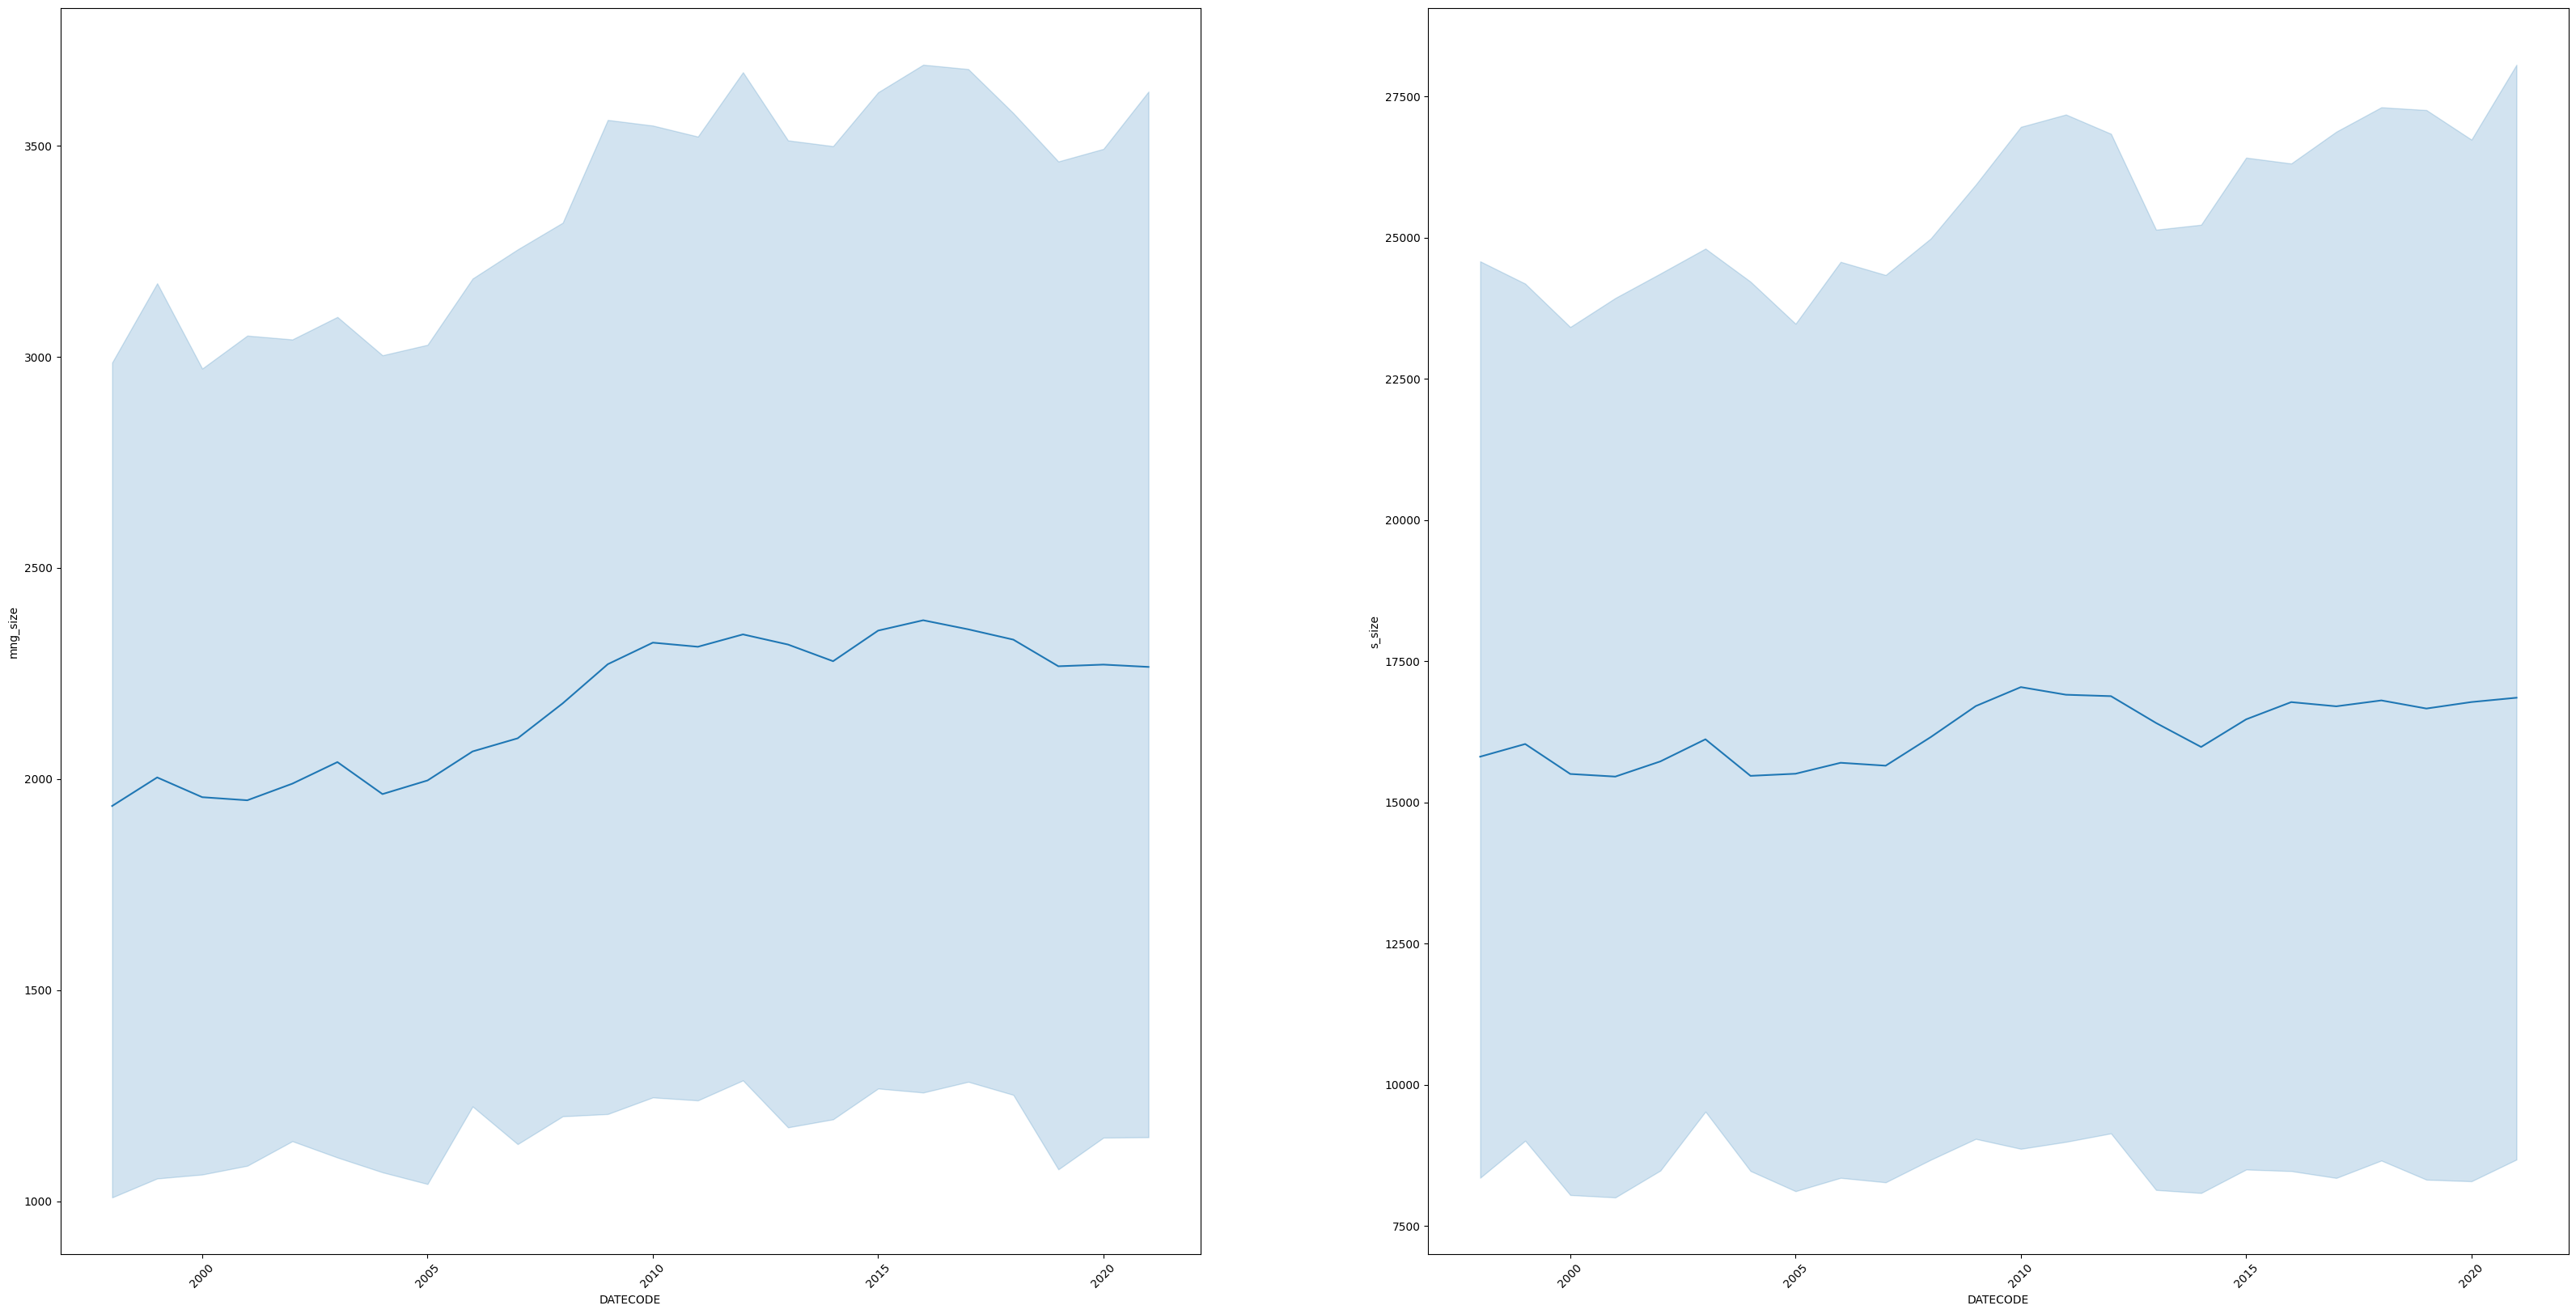

<Figure size 640x480 with 0 Axes>

In [47]:
df1['DATECODE'] = df1['DATECODE'].apply(lambda x: int(str(x)[:4]))
scale_plot(df1, 'by_t')

In [46]:
df1[(df1['3AGY'] == 'VD')]

,3AGY,DATECODE,s_size,5is_mng,reg_frac,mng_size
2799,VD,2013,7,5,0.714286,5.0
2800,VD,2014,14,5,0.357143,5.0
2801,VD,2015,22,5,0.227273,5.0
2802,VD,2016,26,4,0.153846,4.0
2803,VD,2017,17,1,0.058824,1.0
2804,VD,2018,15,1,0.066667,1.0
2805,VD,2019,29,7,0.241379,7.0
2806,VD,2020,32,9,0.281250,9.0
2807,VD,2021,31,5,0.161290,5.0


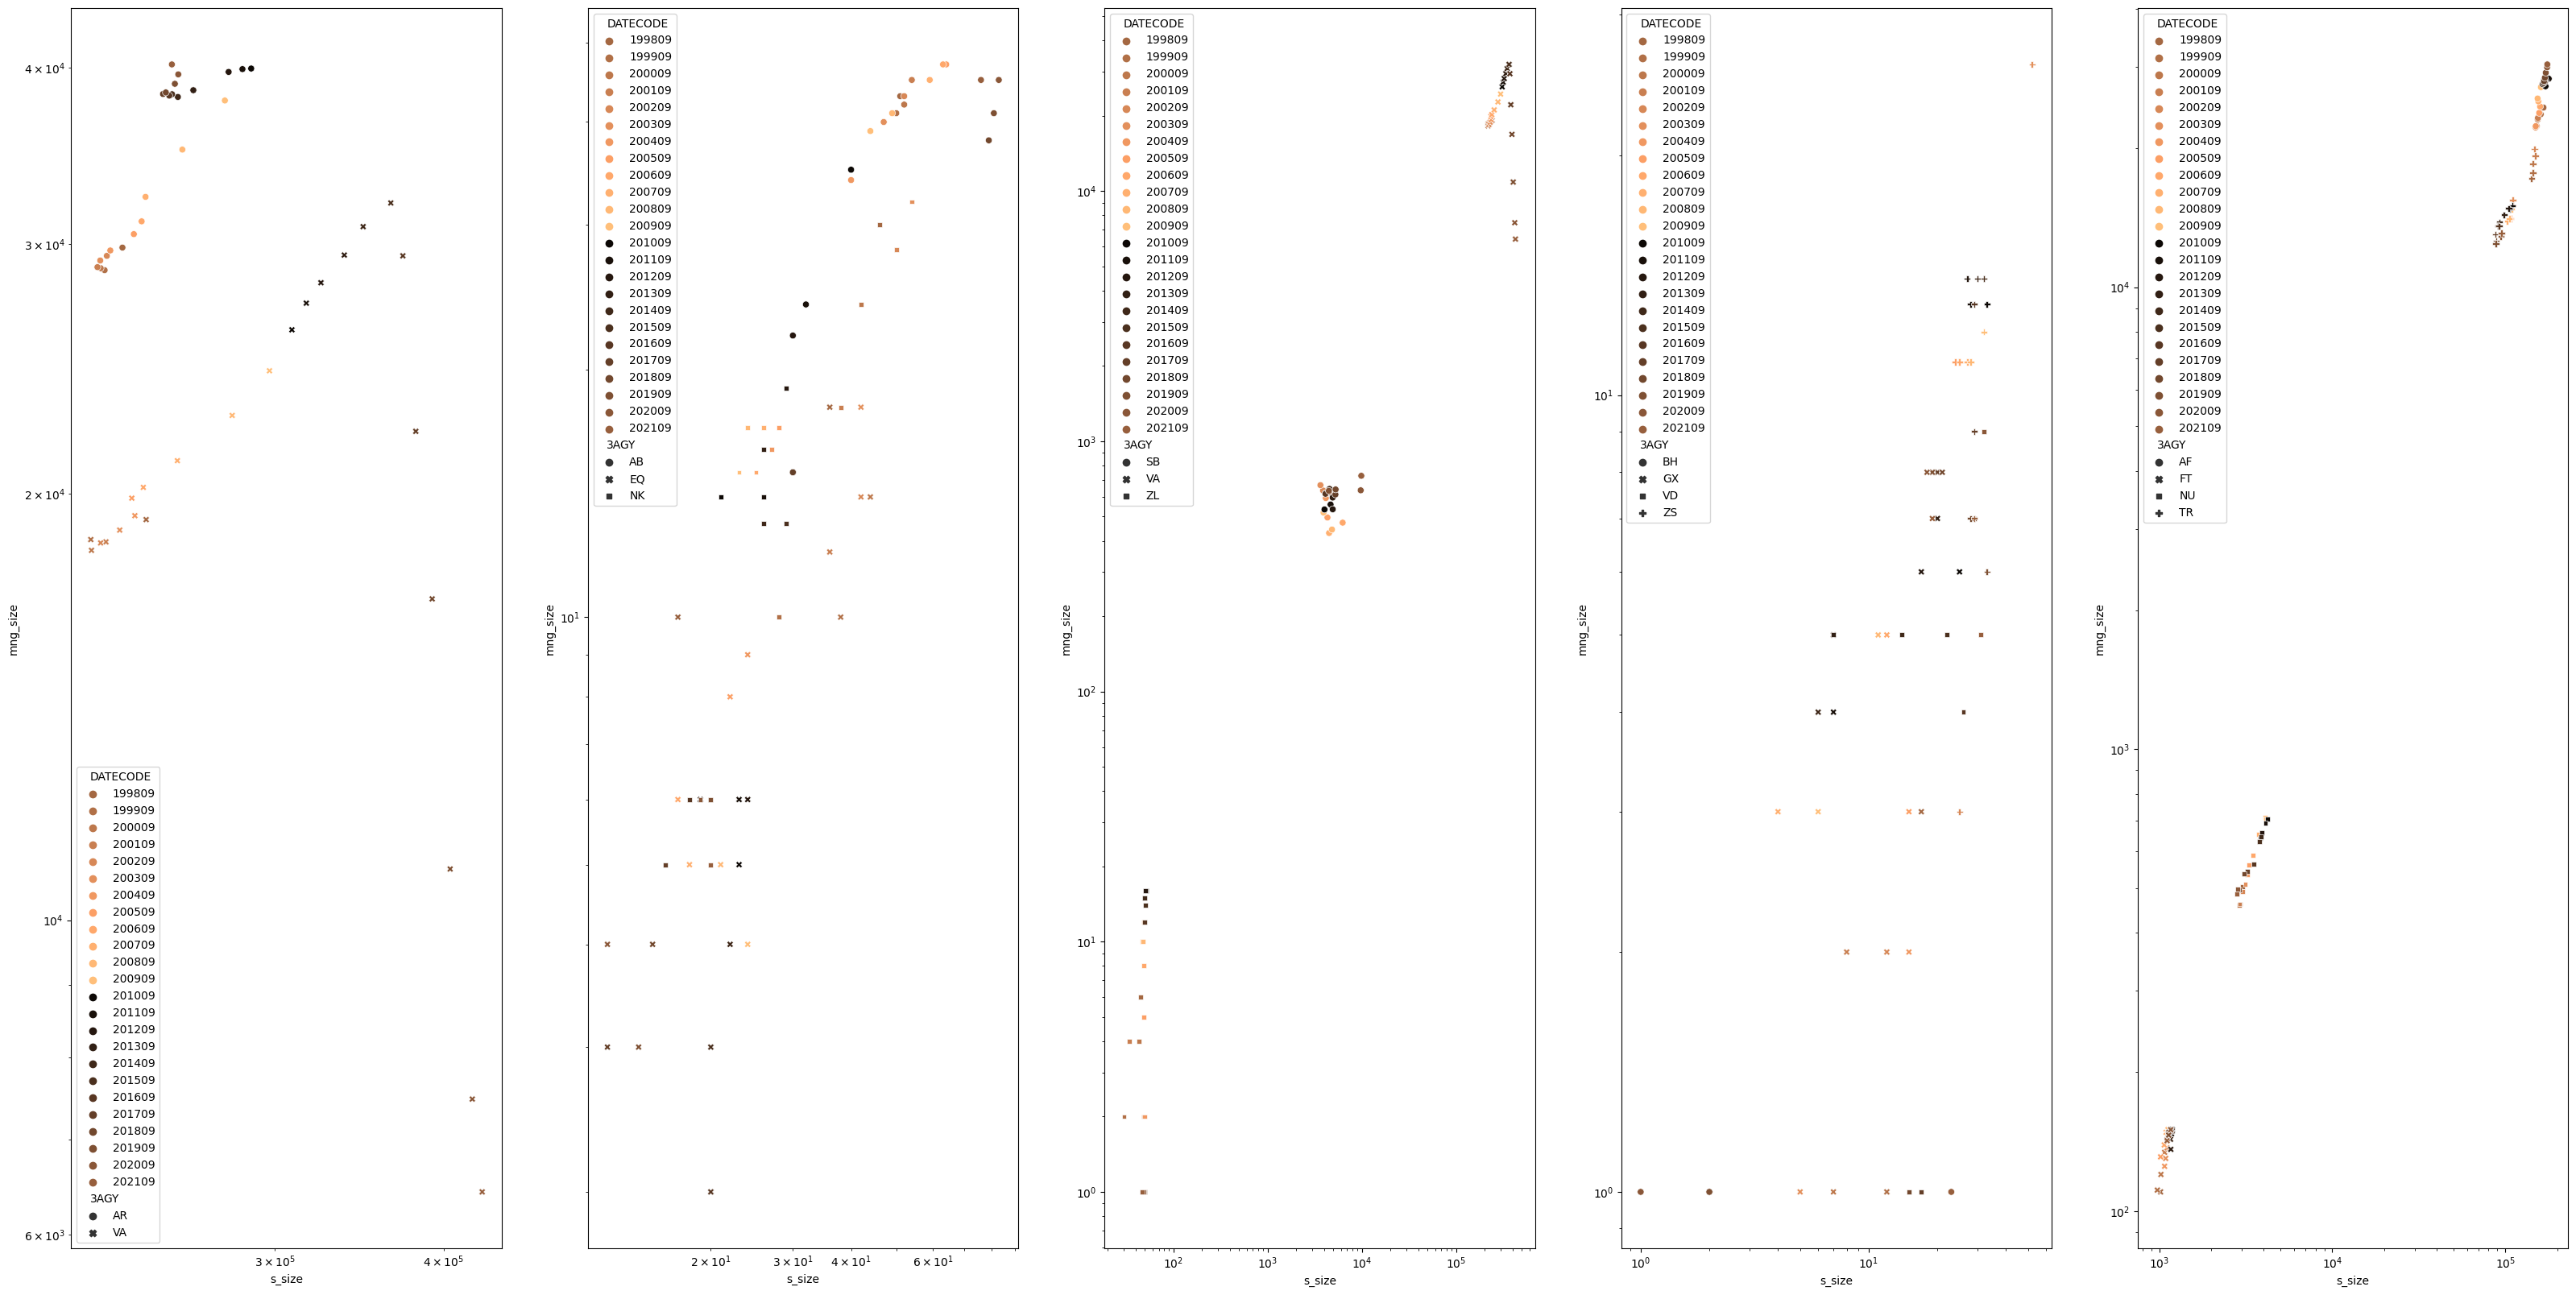

<Figure size 640x480 with 0 Axes>

In [34]:
scale_plot(df1, 'by_ts')

In [4]:
df

name,Amanda,Ashley
year,,
1971,4133,1164
1972,4181,1176
1973,5627,1253
1974,7476,1626
1975,12653,1988
1976,15591,2292
1977,18280,2706
1978,20522,3484
1979,31927,4450


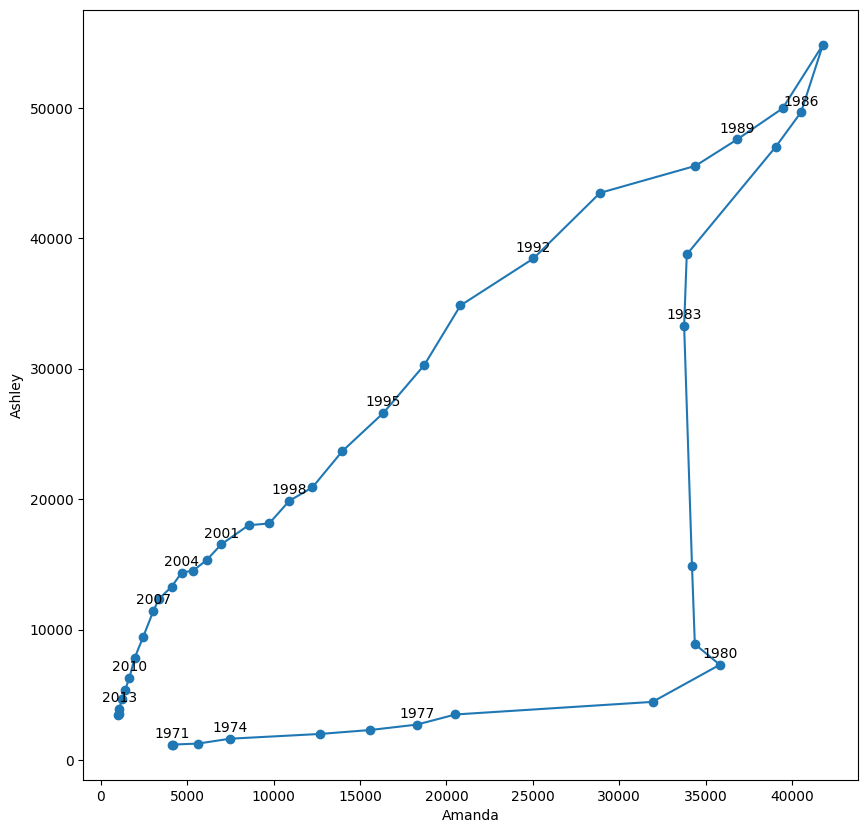

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv")

# filter data
df = df.loc[(df.name=="Ashley") | (df.name=="Amanda")]
df = df.loc[(df.sex=="F") & (df.year>1970)]
df = pd.pivot_table(df, values='n', index=['year'], columns=['name'])

# set the figure size
plt.figure(figsize=(10, 10))

# plot the connected scatterplot
plt.plot(df.Amanda, df.Ashley, '-', marker='o')

# add annotations in every 3 data points with a loop
for line in range(0, df.shape[0], 3):
     plt.annotate(
          df.index[line], 
          (df.Amanda.iloc[line], df.Ashley.iloc[line]+300 ) ,
          va='bottom',
          ha='center'
     )

# x axis label
plt.xlabel('Amanda')

# y axis label
plt.ylabel('Ashley')

# show the graph
plt.show()

In [56]:
df

,3AGY,DATECODE,s_size,5is_mng,reg_frac,mng_size
0,AA,2010,11,2,0.181818,2.0
1,AA,2011,13,3,0.230769,3.0
2,AA,2012,15,2,0.133333,2.0
3,AA,2013,15,3,0.200000,3.0
4,AA,2014,17,3,0.176471,3.0
...,...,...,...,...,...,...
2917,ZU,2021,1,0,0.000000,0.0
2918,ZW,2002,23,17,0.739130,17.0
2919,ZW,2003,28,17,0.607143,17.0
2920,ZW,2004,21,15,0.714286,15.0


In [48]:
df1

,3AGY,DATECODE,s_size,5is_mng,reg_frac,mng_size
0,AA,2010,11,2,0.181818,2.0
1,AA,2011,13,3,0.230769,3.0
2,AA,2012,15,2,0.133333,2.0
3,AA,2013,15,3,0.200000,3.0
4,AA,2014,17,3,0.176471,3.0
...,...,...,...,...,...,...
2917,ZU,2021,1,0,0.000000,0.0
2918,ZW,2002,23,17,0.739130,17.0
2919,ZW,2003,28,17,0.607143,17.0
2920,ZW,2004,21,15,0.714286,15.0


In [55]:
len(df1[df1.s_size > 2000]['3AGY'].unique())

36

In [31]:
dates = df1['DATECODE'].unique()
colors = sns.color_palette("flare", as_cmap=True, n_colors=len(dates))
palette={date: [*color, 1.0] for date, color in zip(dates, colors)} #color and transparent

TypeError: 'ListedColormap' object is not iterable

In [5]:
import pandas as pd
def iter_forming(ITER_IN:str, ITER:str, disagg: str, time_resol:str= 'DATECODE', space_resol:str = '3AGY'): # ratio total 
    '''
    ITER_IN: checking_out, checking_out
    ITER: forming_share_size, forming_cluster. chained (ITER_IN, ITER) makes dict() input a better implementation, by (checking_out, forming_cluster) may be possible
    diagg: by_s, by_st, by_t
    time_resol: 'month', 'year' can be derived from 'DATECODE' #TODO
    '''
    df = pd.read_pickle(f'{ITER_IN}.pkl')
    if ITER == 'forming_size_share':
        # for clustering, it might help to have further specification
        # space_resol = '3AGY':
            # clustering happens on the same level of one agent
        # space_resol =  '4AGYSUB'
            # clustering happens on the one level up of one agent (agency)

        if disagg == 'by_s':
            ts_group = df.groupby(space_resol)

        elif disagg == 'by_t':
            ts_group = df.groupby(time_resol)

        elif disagg == 'by_ts':
            ts_group = df.groupby([space_resol, time_resol])

        s_size = ts_group['EMPLOYMENT'].sum()
        mng = ts_group['5is_mng'].sum()
        mng_frac = pd.concat([s_size, mng], axis =1, ignore_index=False) #indexing with space_resol
        mng_frac.rename(columns={"EMPLOYMENT":"s_size"}, inplace = True)
        mng_frac["reg_frac"]= mng_frac["5is_mng"]/mng_frac["s_size"]
        df['mng_size'] = df['s_size'] * df['reg_frac']
        mng_frac.reset_index(inplace=True)
        save_iter(mng_frac, ITER, disagg) #if merge takes too long
        
    elif ITER == 'forming_cluster':
        df = pd.read_pickle(f'{ITER_IN}.pkl')
        max_comp = 4
        cf = np.zeros(max_comp).tolist()
        def standardize(df:pd.Series) -> pd.Series:
            return (df-df.median())/(df.max() - df.min())
        def log_standardize(df:pd.Series) -> pd.Series:
            df = df.apply(np.log)
            return (df-df.median())/(df.max() - df.min())

        cluster_df = df.assign(std_size = log_standardize(df.s_size), std_ratio = standardize(df.reg_frac)).groupby(space_resol).mean()
        cluster_df.dropna(inplace = True) #3 dropped from log(ratio =0)
        for m in range(2, max_comp):
            cf[m] = GaussianMixture(n_components = m).fit(X = cluster_df[['std_size', 'std_ratio']])
            cluster_df.loc[:, f'c_{m}'] = cf[m].predict(X = cluster_df[['std_size', 'std_ratio']])
            scale_plot(df, disagg, time_resol, space_resol)
            plt.figure(figsize=(15,8))
            sns.scatterplot(cluster_df,  x='std_size', y='std_ratio', hue= f'c_{m}')
            plt.savefig(f"{get_plot_path('agency')}/c_{m}_cluster_{disagg}" + ".png")
        #clustered = df.merge(cluster_df, on = space_resol,)
        save_iter(cluster_df, ITER, disagg)

def iter_plotting(ITER_IN, ITER, disagg):
    # EB vs HF, Education large variation
    df = pd.read_pickle(f'{ITER_IN}.pkl')
    
    scale_plot(df, disagg)
    fig, axes = plt.subplots(1,5, figsize  = (40,15))
    # high_reg_frac = ['AB', 'NK', 'EQ']  # AMERICAN BATTLE MONUMENTS COMMISSION, NATIONAL COUNCIL ON DISABILITY, COUNCIL ON ENVIRONMENTAL QUALITY
    # low_reg_frac = ['ZL', 'VA', 'SB'] # MEDICARE PAYMENT ADVISORY COMMISSION, dep. OF VETERANS AFFAIRS, SMALL BUSINESS ADMINISTRATION'
    # # high freq = large std (assuming oscillation)
    # high_freq = ['VD', 'GX', 'BH', 'ZS'] # privacy-civil liberties oversight board, intl boudary commission:US-Canada,
    #                                     # commission for US heritage abraod presvation, US-canada econ+security review commission
    # low_freq = ['AF', 'TR', 'NU', 'FT'] # air force, dep. of treasury, dep. of treasury, privacy+civil liberties oversight board 
    # theor_responsive = ['NN', 'NF', 'JL', 'HB'] # nasa, nsf, judicial branch, committee for purchase from bind or severly disabled ppl

    # sns.lineplot(df[df['3AGY'].isin(high_reg_frac)], x = 'DATECODE', y = 'reg_frac', ax = axes[0], hue = '3AGY')
    # sns.lineplot(df[df['3AGY'].isin(low_reg_frac)], x = 'DATECODE', y = 'reg_frac', ax = axes[1], hue = '3AGY')
    # sns.lineplot(df[df['3AGY'].isin(high_freq)], x = 'DATECODE', y = 'reg_frac', ax = axes[2], hue = '3AGY')
    # sns.lineplot(df[df['3AGY'].isin(low_freq)], x = 'DATECODE', y = 'reg_frac', ax = axes[3], hue = '3AGY')
    # sns.lineplot(df[df['3AGY'].isin(theor_responsive)], x = 'DATECODE', y = 'reg_frac', ax = axes[4], hue = '3AGY')

    save_iter(df, ITER, disagg)


def branching(df, time_resol:str= 'DATECODE', space_resol:str = '3AGY',branch='senate', from_top=True):
    """
    features: features from below to be tracked other than agnecy hierarchy five level ('AGYTYP', 'AGY', 'AGYSUB') e.g. SALARY
    # original data FACDATA.txt col" ['AGYSUB', 'LOC', 'AGELVL', 'EDLVL', 'GSEGRD', 'LOSLVL', 'OCC', 'PATCO',
    #          'PP', 'PPGRD', 'SALLVL', 'STEMOCC', 'SUPERVIS', 'TOA', 'WORKSCH',
    #          'WORKSTAT', 'DATECODE', 'EMPLOYMENT', 'SALARY', 'LOS', 'AGYTYP',
    #          'AGYTYPT', 'AGY', 'AGYT', 'AGYSUBT'] and by default it is organized into 1-4-130-530-1060 hierarchy
    
    layers: degree of fineness for organization hierarchy after merge(fact,agy)-> groupby, it hierarchize according to `layers`.
    layer 5:                     SUPERVIS
    layer 4:                AGYSUB
    layer 3:              AGY
    layer 2:        AGYTYP
    layer 1: AGY_arch
    """
    if branch == 'mng':
        df['is_mng'] = df["SUPERVIS"].isin(['2', '6', '7']) 

    elif branch == 'senate': # us federal agency, by agency
        #df = df.reset_index()
        size = len(set(df[space_resol]))
        if 'EMPLOYMENT' in df.columns:
            sorted_state = df.groupby(space_resol)['EMPLOYMENT'].count().sort_values()
        else:
            sorted_state = df.groupby(space_resol)['s_size'].count().sort_values()
        # largest
        # VA: dep. verterans affairs (defense) 300k - why this many? + some innovative dep??
        # AR: dep. of army (defense) 250k
        # NV: dep. of navy (defense) 200k
        # AF: dep. of air force (defense) 150k
        # HS: dep. homeland security (defense) 100k
        # DJ: dep. justice 100k
        # TR: dep. treasury 100k
        # DD: dep. of defense 100k
        # AG: dep. of agriculture 100k (innovative)
        # HE: dep. of health and human service 75k

        # high reg frac
        # AB: AMERICAN BATTLE MONUMENTS COMMISSION (.8)
        # NK: NATIONAL COUNCIL ON DISABILITY (.6)
        # EQ: COUNCIL ON ENVIRONMENTAL QUALITY/OFFICE OF ENVIRONMENTAL QUALITY'
        
        # low reg frac
        # ZL:  MEDICARE PAYMENT ADVISORY COMMISSION (.02)
        # VA: DEPARTMENT OF VETERANS AFFAIRS
        # SB-SMALL BUSINESS ADMINISTRATION'
        
        # large oscilation (top10, >10 year) - responsive
        # VD: PRIVACY AND CIVIL LIBERTIES OVERSIGHT BOARD
        # GX: INTERNATIONAL BOUNDARY COMMISSION: UNITED STATES AND CANADA (regulating regulators of conflict)
        # BH: COMMISSION FOR THE PRESERVATION OF AMERICA'S HERITAGE ABROAD  0.374149

        # small oscialation (< .01, > 10 year)
        # NU: NUCLEAR REGULATORY COMMISSION 0.005
        # FT: FEDERAL TRADE COMMISSION      0.006
        # TR: DEPARTMENT OF THE TREASURY .006
        # AF: AIR FORCE .009

        # ZS-UNITED STATES-CHINA ECONOMIC AND SECURITY REVIEW COMMISSION', (.5)
        # MI: MILLENNIUM CHALLENGE CORPORATION (.6)
        # NS-NATIONAL SECURITY COUNCIL (.6)
        # 'NF-NATIONAL SCIENCE FOUNDATION',
        ## notable
        # DB: PUBLIC INTEREST DECLASSIFICATION BOARD 0.439841 (small size, zero mng)
        # DG: NORTHERN BORDER REGIONAL COMMISSION (~5 but survivor! 10~21)
        # YF :??  0.478675 (two year: 10/11-13/56)

        
        ##########################################
        # df[(df.reg_frac > np.percentile(df.reg_frac, 95)) & (df.s_size > 30)]
        # df[df['3AGY'].isin(df.groupby('3AGY').reg_frac.std().dropna().sort_values()[-10:].index) & (df.s_size>10)]
        ##########################################
        if from_top:
            for tq in [.02, .05, .1]:
                s_state = sorted_state[int(-size*tq):]
                df = df.iloc[(np.where(~df[space_resol].isin(s_state.index)))]  
                #df = df.assign(is_stop = lambda x: x[space_resol].isin(s_state)) #doesn't filter out
                df.rename(columns = {'is_stop': f'is_stop{tq}'}, inplace=True)
        else:
            for bq in [.1]:
                s_state = sorted_state[:int(size*bq)]
                df = df.iloc[(np.where(~df[space_resol].isin(s_state.index)))] # cut-off 200, 'DO', 'GN', 'YG', 'DA', 'EV', 'IP', 'ZQ', 'ZN', 'YA', 'GU', 'WK', 'GZ','ZK', 'KY', 'AC', 
                #'YE' (two years) COMMISSION ON THE PREVENTION OF WEAPONS OF MASS DESTRUCTION PROLIFERATION AND TERRORISM
                df.rename(columns = {'is_sbot': f'is_sbot{bq}'}, inplace=True)
            #similar effect with df  = df[~(df.s_size < 10)] EXCEPT no s_size yet so need to extract index by first groupby 

    elif branch == 'representative': # us federal agency as a whole, proportional
        size = df.shape[0]
        sorted_state_cumsum = df.groupby(space_resol)['s_size'].count().sort_values().cumsum()
        if from_top:
            for tq in [.02, .05, .1]:
                r_state = sorted_state_cumsum > size* (1-tq)
                df[f'is_rtop{tq}'] = df[(np.where(~df[space_resol].isin(s_state.index)))] # doesn't work #TODO
                df = df.assign(is_rtop = lambda x: x[space_resol].isin(r_state))
                df.rename(columns = {'is_rtop': f'is_rtop{tq}'}, inplace=True)    
        else:
            for bq in [.1]:
                r_state = sorted_state_cumsum < size* bq
                df = df.assign(is_rbot = lambda x: x[space_resol].isin(r_state))
                df.rename(columns = {'is_rbot': f'is_rbot{bq}'}, inplace=True)
    return df

    space_resol_angle = dict(
        top1=['VA', 'AR'],
        top5=['VA', 'AR', 'NV','AF','HS'],
        high_reg_frac = ['AB', 'NK', 'EQ'],
        low_reg_frac = ['ZL', 'VA', 'SB'],
        high_freq = ['VD', 'GX', 'BH', 'ZS'],
        low_freq = ['AF', 'TR', 'NU', 'FT'], 
        theor_responsive = ['NN', 'NF', 'JL', 'HB']
    )
    # top10=['VA', 'AR', 'NV','AF','HS','DJ','TR','DD','AG','HE'],
    # defense=['AR','NV', 'AF','HS', 'DD'],
    # reg = ['AB', 'EQ', 'MI', 'NK', 'NS', 'RO', 'YD', 'ZS']
    # high_reg_frac = ['AB', 'NK', 'EQ']  # AMERICAN BATTLE MONUMENTS COMMISSION, NATIONAL COUNCIL ON DISABILITY, COUNCIL ON ENVIRONMENTAL QUALITY
    # low_reg_frac = ['ZL', 'VA', 'SB'] # MEDICARE PAYMENT ADVISORY COMMISSION, dep. OF VETERANS AFFAIRS, SMALL BUSINESS ADMINISTRATION'
    # # high freq = large std (assuming oscillation)
    # high_freq = ['VD', 'GX', 'BH', 'ZS'] # privacy-civil liberties oversight board, intl boudary commission:US-Canada,
    #                                     # commission for US heritage abraod presvation, US-canada econ+security review commission
    # low_freq = ['AF', 'TR', 'NU', 'FT'] # air force, dep. of treasury, dep. of treasury,
    # theor_responsive = ['NN', 'NF', 'JL', 'HB'] # nasa, nsf, judicial branch, committee for purchase from bind or severly disabled ppl
    df['DATECODE'] = df['DATECODE'].astype('int')
    plot_path = get_plot_path('agency')
    figsize = (20, 20)
    if disagg == "by_t": # TODO meaning of scaling analysis with marginalize over agency, one agency's time series is tricky for scaling analysis
        fig, axes = plt.subplots(1,2, figsize = figsize)
        # need groupby(space_resol), but seaborn provides "Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:"
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].tick_params(axis='x', rotation=45)
        sns.lineplot(df, x='DATECODE', y='reg_frac', ax = axes[0]) # disagg by time = groupby space!
        sns.lineplot(df, x='DATECODE', y='s_size', ax = axes[1]) 

    elif disagg == "by_s": # space disaggregation
        _, axes = plt.subplots(1, len(space_resol_angle), figsize=figsize)
        plt.setp(axes, xlim = (10**5,5*10**6), ylim = (0,100))
        for i, agg in enumerate(space_resol_angle.values()): 
            axes[i].set(xscale="log", yscale="log")
            sns.scatterplot(df[df[space_resol].isin(agg)],  x='s_size', y='reg_frac',hue=space_resol, ax = axes[i])
        
    elif disagg == "by_ts": # timeXspace disaggregation
        _, axes = plt.subplots(1, len(space_resol_angle), figsize=figsize)
        
        for i, agg in enumerate(space_resol_angle.values()):
            axes[i].set(xscale="log", yscale="log")
            sns.scatterplot(df[['s_size', 'reg_frac',time_resol]],  x='s_size', y='reg_frac',hue=time_resol, ax = axes[i])
            df['mng_size'] = df['s_size'] * df['reg_frac'] 

            
            sns.scatterplot(df, x='s_size', y='mng_size',hue='DATECODE', ax =ax)
    plt.show()
    plt.savefig(f"{get_plot_path('agency')}/loglog_share_size_{disagg}" + ".png")
    plt.clf()

def scale_plot(df, disagg, time_resol = 'DATECODE', space_resol = '3AGY'):
    space_resol_angle = dict(
        # top1=['VA', 'AR'],
        # high_freq = ['VD'],
        # low_freq = ['AF'],
        top1=['VA', 'AR'],
        #top5=['VA', 'AR', 'NV','AF','HS'],
        #high_reg_frac = ['AB', 'NK', 'EQ'],
        #low_reg_frac = ['ZL', 'VA', 'SB'],
        high_freq = ['VD', 'GX', 'BH', 'ZS'],
        low_freq = ['AF', 'TR', 'NU', 'FT'], 
        theor_responsive = ['NN', 'NF', 'JL', 'HB']
    )
    # top10=['VA', 'AR', 'NV','AF','HS','DJ','TR','DD','AG','HE'],
    # defense=['AR','NV', 'AF','HS', 'DD'],
    # reg = ['AB', 'EQ', 'MI', 'NK', 'NS', 'RO', 'YD', 'ZS']
    # high_reg_frac = ['AB', 'NK', 'EQ']  # AMERICAN BATTLE MONUMENTS COMMISSION, NATIONAL COUNCIL ON DISABILITY, COUNCIL ON ENVIRONMENTAL QUALITY
    # low_reg_frac = ['ZL', 'VA', 'SB'] # MEDICARE PAYMENT ADVISORY COMMISSION, dep. OF VETERANS AFFAIRS, SMALL BUSINESS ADMINISTRATION'
    # # high freq = large std (assuming oscillation)
    # high_freq = ['VD', 'GX', 'BH', 'ZS'] # privacy-civil liberties oversight board, intl boudary commission:US-Canada,
    #                                     # commission for US heritage abraod presvation, US-canada econ+security review commission
    # low_freq = ['AF', 'TR', 'NU', 'FT'] # air force, dep. of treasury, dep. of treasury, privacy+civil liberties oversight board 
    # theor_responsive = ['NN', 'NF', 'JL', 'HB'] # nasa, nsf, judicial branch, committee for purchase from bind or severly disabled ppl
    #df['DATECODE'] = df['DATECODE'].astype('int')
    df['mng_size'] = df['s_size'] * df['reg_frac'] 
    
    plot_path = get_plot_path('agency')
    figsize = (40, 20)
    if (disagg == "by_t") or (disagg == "by_ts"):
        dates = df['DATECODE'].unique()
        colors = sns.color_palette("flare", as_cmap=True, n_colors=len(dates))
        palette={date: [*color, 1.0] for date, color in zip(dates, colors)} #color and transparent

    if disagg == "by_t": # TODO meaning of scaling analysis with marginalize over agency, one agency's time series is tricky for scaling analysis
        fig, axes = plt.subplots(1,2, figsize = figsize)
        # need groupby(space_resol), but seaborn provides "Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:"
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].tick_params(axis='x', rotation=45)
        sns.lineplot(df, x='DATECODE', y='reg_frac', ax = axes[0]) # disagg by time = groupby space!
        sns.lineplot(df, x='DATECODE', y='s_size', ax = axes[1]) 

    elif disagg == "by_s": # space disaggregation
        _, axes = plt.subplots(1, len(space_resol_angle), figsize=figsize)
        #plt.setp(axes, xlim = (10**5,5*10**6), ylim = (0,100))
        for i, agg in enumerate(space_resol_angle.values()): 
            axes[i].set(xscale="log", yscale="log")
            sns.scatterplot(df[df[space_resol].isin(agg)],  x='s_size', y='mng_size',hue=space_resol, ax = axes[i])
        
    elif disagg == "by_ts": # timeXspace disaggregation
        _, axes = plt.subplots(1, len(space_resol_angle), figsize=figsize)
        
        for i, agg in enumerate(space_resol_angle.values()):
            df_by_ts = df[df['3AGY'].isin(agg)]
            axes[i].set(xscale="log", yscale="log")
            sns.scatterplot(df_by_ts[df_by_ts['3AGY'].isin(agg)], x='s_size', y='mng_size',hue='DATECODE', ax =axes[i], palette = palette)
    plt.show()
    plt.savefig(f"{get_plot_path('agency')}/loglog_share_size_{disagg}" + ".png")
    plt.clf()


In [6]:
scale_plot(df1, 'by_t')

NameError: name 'df1' is not defined

In [1]:
def iter_agency(ITER, disagg='by_ts', time_resol = 'DATECODE', space_resol = '3AGY'): #df, iter, is_imgrt = False
    set_dir_agencydata()
    # checking_out:
    # dirty check on prior for forming_size_share, differentiate signal and noise
    # - outing(x) in film titled #episode5.1, 2001-01-01, NaN
    # - agencies with one employee or span only two years among 24 years
    # - newly developed engines 

    # forming_size_share:
    # - hierarchize: str, ining, iding_mutant, plotting
    # - merge: prior + likelihood : merge existing + new info

    # checking_in:
    # first check on prior for opt out: 
    # - outing(x) in film titled #episode5.1
    # - too small agencies filter out? (differentiate signal and noise)

    # projecting: 
    # - summary statistics (ratio)
    if disagg == "by_t": # entire gov by time, no branching (i.e.checking) needed
        iter_input =   {'plotting':'forming_size_share','forming_size_share':'preparing'}
    elif disagg == "by_s":
        iter_input =   {'plotting':'forming_cluster','forming_cluster':'checking_in', 'checking_in':'forming_size_share','forming_size_share':'checking_out','checking_out':'preparing'}
    elif disagg == "by_ts":
        iter_input =   {'plotting':'forming_cluster','forming_cluster':'checking_in', 'checking_in':'forming_size_share','forming_size_share':'checking_out','checking_out':'preparing'}
    
    TIME_YEAR = [str(i) for i in np.arange(1998, 2022, 1)]
    TIME_MONTH = ["09"] #, "12"]
    time_lst = [year + month for year in TIME_YEAR for month in TIME_MONTH]
    feature =['DATECODE','SALARY', 'EMPLOYMENT']

    if ITER == 'preparing': #load data to use
        # marginalize over agencies; projection on time hetero, # marginalize over years; projection on space hetero
        # compare (by_t, by_ts) specific shruken agency, (by_s, by_ts): tumultous time after2008
        iter_preparing(time_lst, feature, ITER)

    elif ITER == 'checking_out': # exclude bottom 5
        if disagg=='by_t':
            print("pass: disagg by time cannot do checking") #raise NotImplementedError
        else:
            iter_checking(iter_input[f'ITER_{disagg}'],ITER)

    elif ITER == 'forming_size_share':
        iter_forming(iter_input[f'ITER_{disagg}'], ITER, disagg, time_resol, space_resol) # hierarchize and make features 
        # groupby agency or agencysub, to summarize its size an share within

    elif ITER == 'checking_in': # include bottom 5
        if disagg=='by_t':
            print("pass: disagg by time cannot do checking") #raise NotImplementedError
        else:
            iter_checking(iter_input[f'ITER_{disagg}'],ITER)
        # individual: `is_mng`
        # agency: individual, `is_top1`, `is_top10`, `is_top25`  across time, space

    elif ITER == 'forming_cluster':
        if disagg=='by_t':
            print("pass: disagg by time cannot form cluster as space is homogenous") #raise NotImplementedError
        else:
            iter_forming(iter_input[f'ITER_{disagg}'], ITER, disagg, time_resol, space_resol) # hierarchize and make features 
        
        # groupby agency or agencysub, to summarize its size an share within

    elif ITER == 'plotting':
        iter_plotting(iter_input[f'ITER_{disagg}'], ITER, disagg)    


In [2]:
iter_forming(ITER_IN = 'checking_out_by_s', ITER = 'forming_size_share', disagg = 'by_ts')

NameError: name 'iter_forming' is not defined

In [7]:
def iter_forming(ITER_IN:str, ITER:str, disagg: str, time_resol:str= 'DATECODE', space_resol:str = '3AGY'): # ratio total 
    '''
    ITER_IN: checking_out, checking_out
    ITER: forming_share_size, forming_cluster. chained (ITER_IN, ITER) makes dict() input a better implementation, by (checking_out, forming_cluster) may be possible
    diagg: by_s, by_st, by_t
    time_resol: 'month', 'year' can be derived from 'DATECODE' #TODO
    '''
    df = pd.read_pickle(f'{ITER_IN}.pkl')
    if ITER == 'forming_size_share':
        # for clustering, it might help to have further specification
        # space_resol = '3AGY':
            # clustering happens on the same level of one agent
        # space_resol =  '4AGYSUB'
            # clustering happens on the one level up of one agent (agency)

        if disagg == 'by_s':
            ts_group = df.groupby(space_resol)

        elif disagg == 'by_t':
            ts_group = df.groupby(time_resol)

        elif disagg == 'by_ts':
            ts_group = df.groupby([space_resol, time_resol])

        s_size = ts_group['EMPLOYMENT'].sum()
        mng = ts_group['5is_mng'].sum()
        mng_frac = pd.concat([s_size, mng], axis =1, ignore_index=False) #indexing with space_resol
        mng_frac.rename(columns={"EMPLOYMENT":"s_size"}, inplace = True)
        mng_frac["reg_frac"]= mng_frac["5is_mng"]/mng_frac["s_size"]
        df['mng_size'] = df['s_size'] * df['reg_frac']
        mng_frac.reset_index(inplace=True)
        save_iter(mng_frac, ITER, disagg) #if merge takes too long

In [ ]:
iter_agency

In [7]:

a = pd.read_pickle("checking_out_by_ts.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'checking_out_by_ts.pkl'

In [3]:
a

,DATECODE,SALARY,EMPLOYMENT,2AGYTYP,3AGY,4AGYSUB,5is_mng
0,199809,"$42,709",1,4,AB,AB00,True
1,199809,"$31,045",1,4,AB,AB00,True
2,199809,"$31,266",1,4,AB,AB00,False
3,199809,"$57,393",1,4,AB,AB00,True
4,199809,NaN,1,4,AB,AB00,True
...,...,...,...,...,...,...,...
2191006,202109,173074.0,1,4,ZS,ZS00,False
2191007,202109,57000.0,1,4,ZS,ZS00,False
2191008,202109,75500.0,1,4,ZS,ZS00,False
2191009,202109,41000.0,1,4,ZS,ZS00,False


In [1]:
import pandas
import string
import xarray as xr
import pandas as pd
import numpy as np
from workflow import *
import matplotlib.pyplot  as plt
workflow = ['forming_size_share','checking_in','forming_cluster', 'plotting']#['checking_out','forming_size_share','checking_in','forming_cluster', 'plotting']
for w in workflow:
    iter_agency(ITER = w, disagg='by_ts')
    #iter_agency(ITER = w, disagg='by_t')
    #iter_agency(ITER = w, disagg='by_ts')
#df = pd.read_pickle("checking_in.pkl")


KeyError: 's_size'

In [11]:
df = pd.read_pickle("forming_size_share.pkl")
df

,3AGY,DATECODE,s_size,5is_mng,reg_frac
0,AA,201009,11,2,0.181818
1,AA,201109,13,3,0.230769
2,AA,201209,15,2,0.133333
3,AA,201309,15,3,0.200000
4,AA,201409,17,3,0.176471
...,...,...,...,...,...
2917,ZU,202109,1,0,0.000000
2918,ZW,200209,23,17,0.739130
2919,ZW,200309,28,17,0.607143
2920,ZW,200409,21,15,0.714286


In [7]:
df['DATECODE'] = df['DATECODE'].apply(lambda x: str(x))
df.dtypes

3AGY           object
DATECODE       object
s_size          int64
5is_mng         int64
reg_frac      float64
is_sbot0.1       bool
mng_size      float64
dtype: object

In [15]:
df

,3AGY,DATECODE,s_size,5is_mng,reg_frac,mng_size
0,AA,201009,11,2,0.181818,2.0
1,AA,201109,13,3,0.230769,3.0
2,AA,201209,15,2,0.133333,2.0
3,AA,201309,15,3,0.200000,3.0
4,AA,201409,17,3,0.176471,3.0
...,...,...,...,...,...,...
2917,ZU,202109,1,0,0.000000,0.0
2918,ZW,200209,23,17,0.739130,17.0
2919,ZW,200309,28,17,0.607143,17.0
2920,ZW,200409,21,15,0.714286,15.0


In [27]:
def scale_plot(df, disagg, time_resol = 'DATECODE', space_resol = '3AGY'):
    space_resol_angle = dict(
        # top1=['VA', 'AR'],
        # high_freq = ['VD'],
        # low_freq = ['AF'],
        top1=['VA', 'AR'],
        #top5=['VA', 'AR', 'NV','AF','HS'],
        high_reg_frac = ['AB', 'NK', 'EQ'],
        low_reg_frac = ['ZL', 'VA', 'SB'],
        high_freq = ['VD', 'GX', 'BH', 'ZS'],
        low_freq = ['AF', 'TR', 'NU', 'FT'], 
        #theor_responsive = ['NN', 'NF', 'JL', 'HB']
    )
        #     top1=['VA', 'AR'],
        # top5=['VA', 'AR', 'NV','AF','HS'],
        # high_reg_frac = ['AB', 'NK', 'EQ'],
        # low_reg_frac = ['ZL', 'VA', 'SB'],
        # high_freq = ['VD', 'GX', 'BH', 'ZS'],
        # low_freq = ['AF', 'TR', 'NU', 'FT'], 
        # theor_responsive = ['NN', 'NF', 'JL', 'HB']
    # top10=['VA', 'AR', 'NV','AF','HS','DJ','TR','DD','AG','HE'],
    # defense=['AR','NV', 'AF','HS', 'DD'],
    # reg = ['AB', 'EQ', 'MI', 'NK', 'NS', 'RO', 'YD', 'ZS']
    # high_reg_frac = ['AB', 'NK', 'EQ']  # AMERICAN BATTLE MONUMENTS COMMISSION, NATIONAL COUNCIL ON DISABILITY, COUNCIL ON ENVIRONMENTAL QUALITY
    # low_reg_frac = ['ZL', 'VA', 'SB'] # MEDICARE PAYMENT ADVISORY COMMISSION, dep. OF VETERANS AFFAIRS, SMALL BUSINESS ADMINISTRATION'
    # # high freq = large std (assuming oscillation)
    # high_freq = ['VD', 'GX', 'BH', 'ZS'] # privacy-civil liberties oversight board, intl boudary commission:US-Canada,
    #                                     # commission for US heritage abraod presvation, US-canada econ+security review commission
    # low_freq = ['AF', 'TR', 'NU', 'FT'] # air force, dep. of treasury, dep. of treasury, privacy+civil liberties oversight board 
    # theor_responsive = ['NN', 'NF', 'JL', 'HB'] # nasa, nsf, judicial branch, committee for purchase from bind or severly disabled ppl
    #df['DATECODE'] = df['DATECODE'].astype('int')
    df['mng_size'] = df['s_size'] * df['reg_frac'] 
    
    plot_path = get_plot_path('agency')
    figsize = (40, 20)
    if (disagg == "by_t") or (disagg == "by_ts"):
        dates = df['DATECODE'].unique()
        colors = sns.color_palette("copper", n_colors=len(dates))
        palette={date: [*color, 1.0] for date, color in zip(dates, colors)} #color and transparent

    if disagg == "by_t": # TODO meaning of scaling analysis with marginalize over agency, one agency's time series is tricky for scaling analysis
        fig, axes = plt.subplots(1,2, figsize = figsize)
        # need groupby(space_resol), but seaborn provides "Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:"
        axes[0].tick_params(axis='x', rotation=45)
        axes[1].tick_params(axis='x', rotation=45)
        sns.lineplot(df, x='DATECODE', y='mng_size', ax = axes[0]) # disagg by time = groupby space!
        sns.lineplot(df, x='DATECODE', y='s_size', ax = axes[1]) 

    elif disagg == "by_s": # space disaggregation
        _, axes = plt.subplots(1, len(space_resol_angle), figsize=figsize)
        #plt.setp(axes, xlim = (10**5,5*10**6), ylim = (0,100))
        for i, agg in enumerate(space_resol_angle.values()): 
            axes[i].set(xscale="log", yscale="log")
            sns.scatterplot(df[df[space_resol].isin(agg)],  x='s_size', y='mng_size',hue=space_resol, ax = axes[i])
        
    elif disagg == "by_ts": # timeXspace disaggregation
        _, axes = plt.subplots(1, len(space_resol_angle), figsize=figsize)
        
        for i, agg in enumerate(space_resol_angle.values()):
            df_by_ts = df[df['3AGY'].isin(agg)]
            axes[i].set(xscale="log", yscale="log")
            #sns.scatterplot(df[['s_size', 'reg_frac',time_resol]],  x='s_size', y='reg_frac',hue=time_resol, ax = axes[i])
            #plt.scatter(x=df_by_ts_agg['s_size'], y=df_by_ts_agg['mng_size'],hue='DATECODE', style ='3AGY',  linestyle='-', ax =axes[i])
            sns.scatterplot(df_by_ts[df_by_ts['3AGY'].isin(agg)], x='s_size', y='mng_size',hue='DATECODE', ax =axes[i], palette = palette, style='3AGY')
    plt.show()
    plt.savefig(f"{get_plot_path('agency')}/loglog_share_size_{disagg}" + ".png")
    plt.clf()
    #connect 


In [23]:
colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


In [26]:
df1.dtypes

3AGY         object
DATECODE      int64
s_size        int64
5is_mng       int64
reg_frac    float64
mng_size    float64
dtype: object

In [30]:
df1.dtypes

3AGY         object
DATECODE      int64
s_size        int64
5is_mng       int64
reg_frac    float64
mng_size    float64
dtype: object

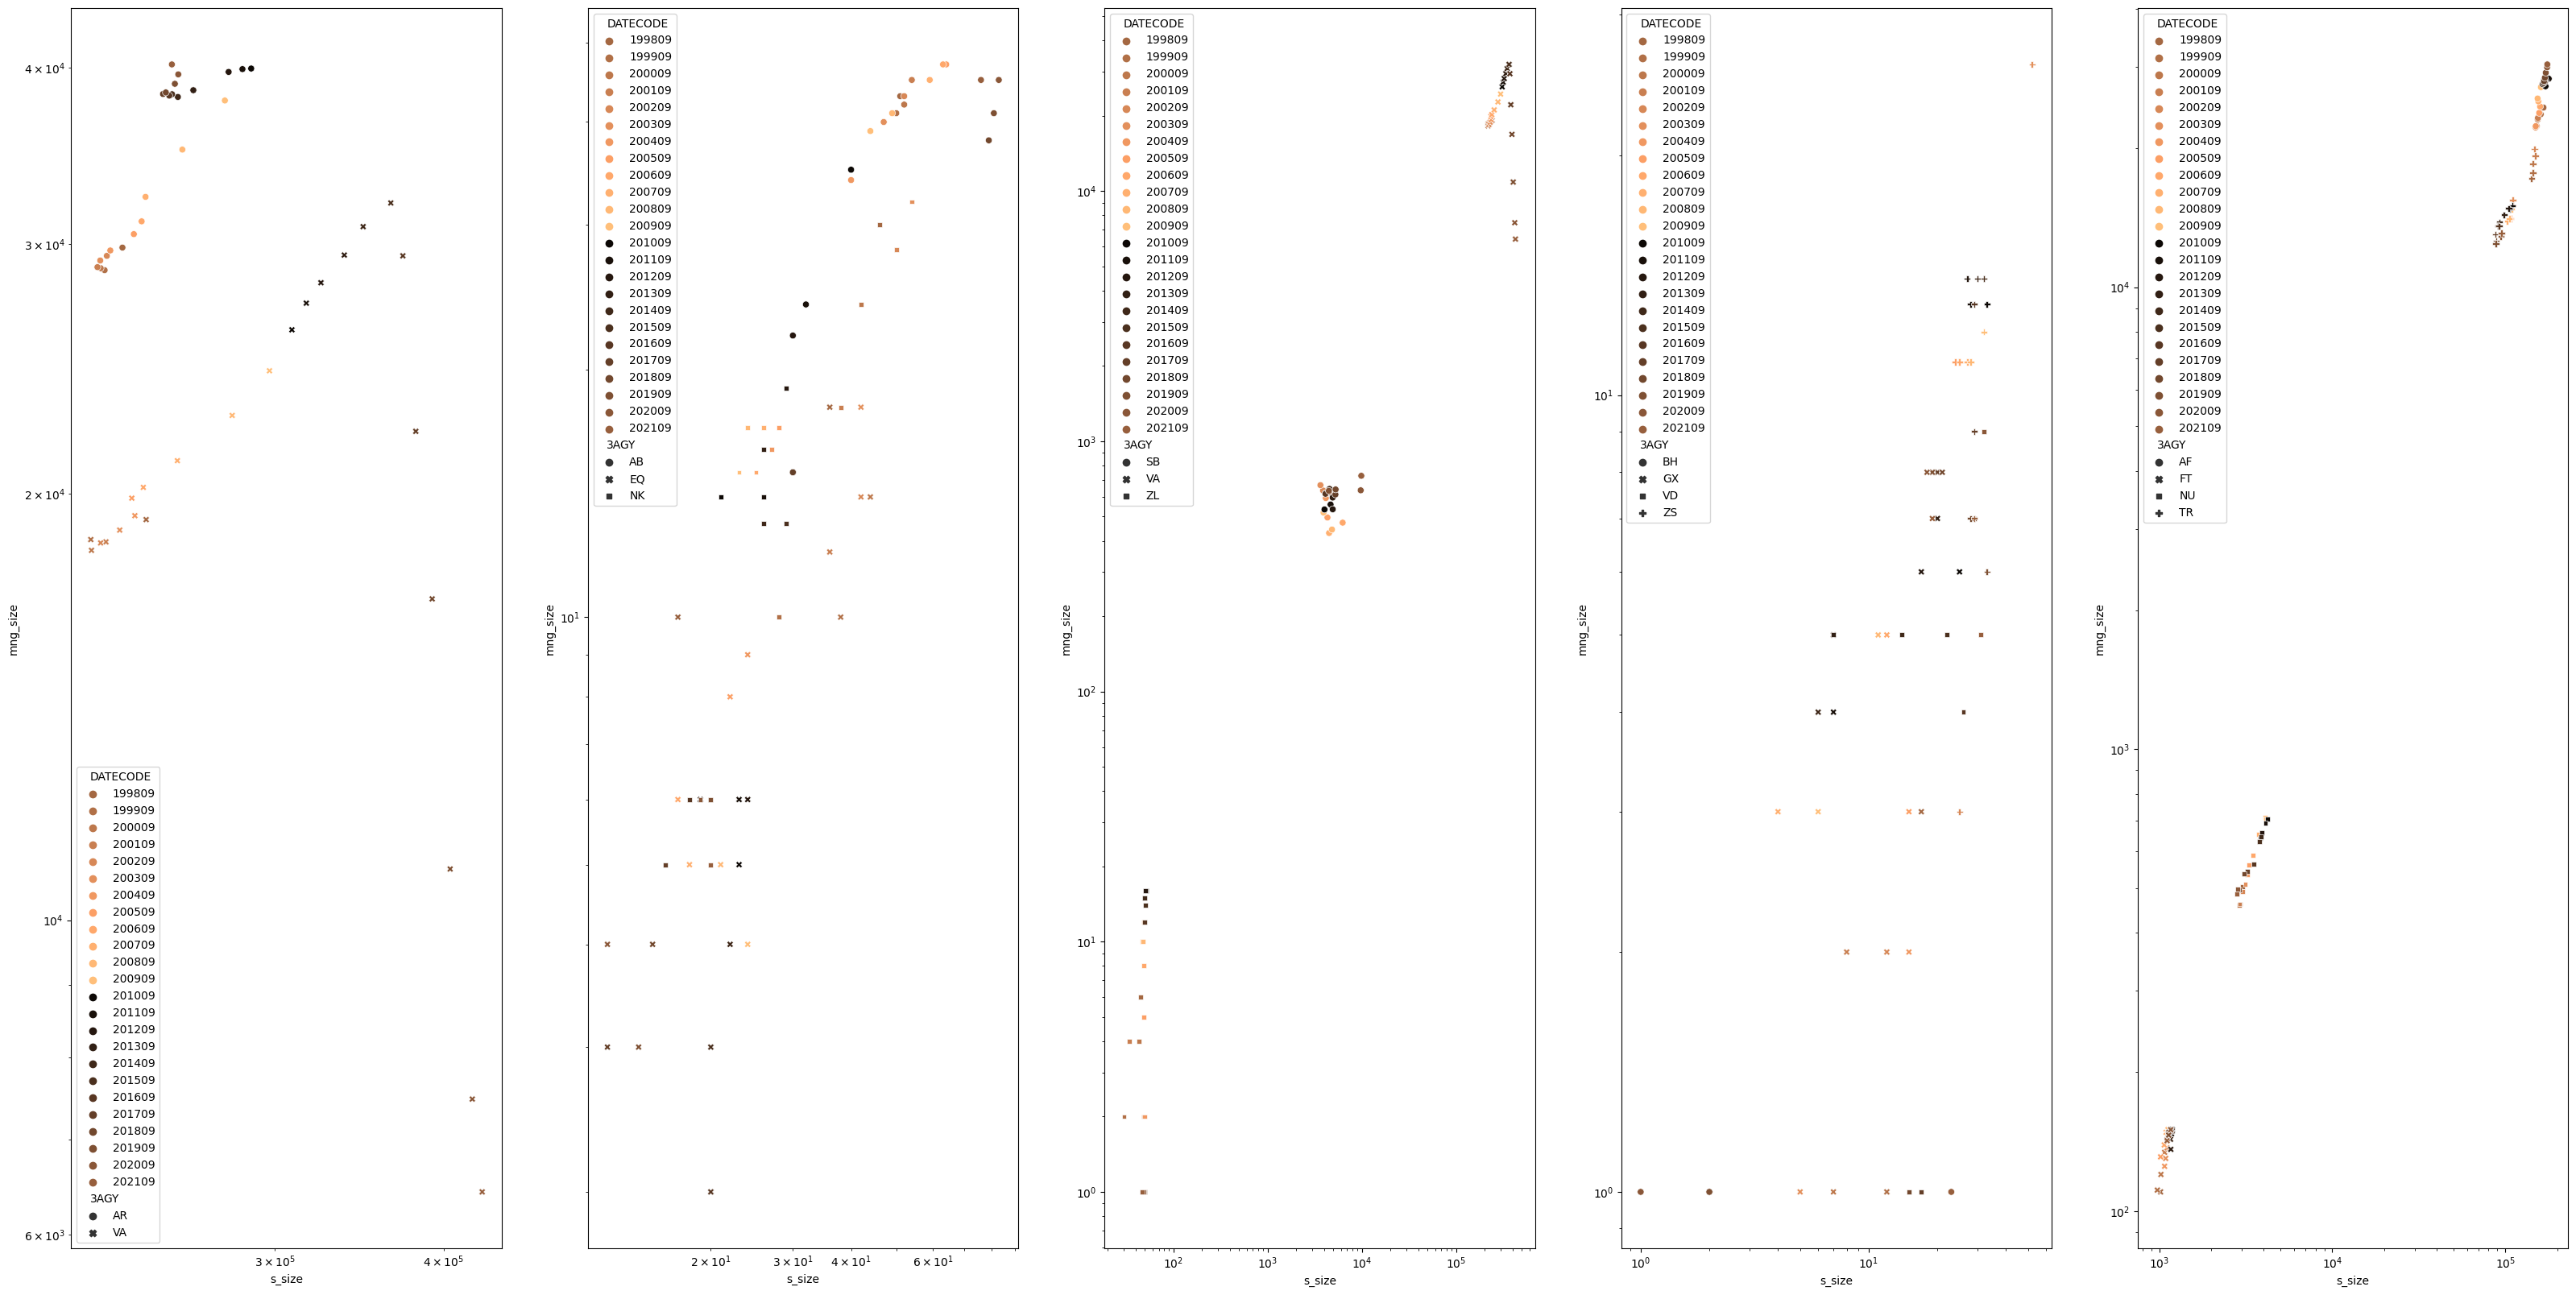

<Figure size 640x480 with 0 Axes>

In [28]:
df1 = df
df1['DATECODE'] = df1['DATECODE'].astype('int')
scale_plot(df1,'by_ts')


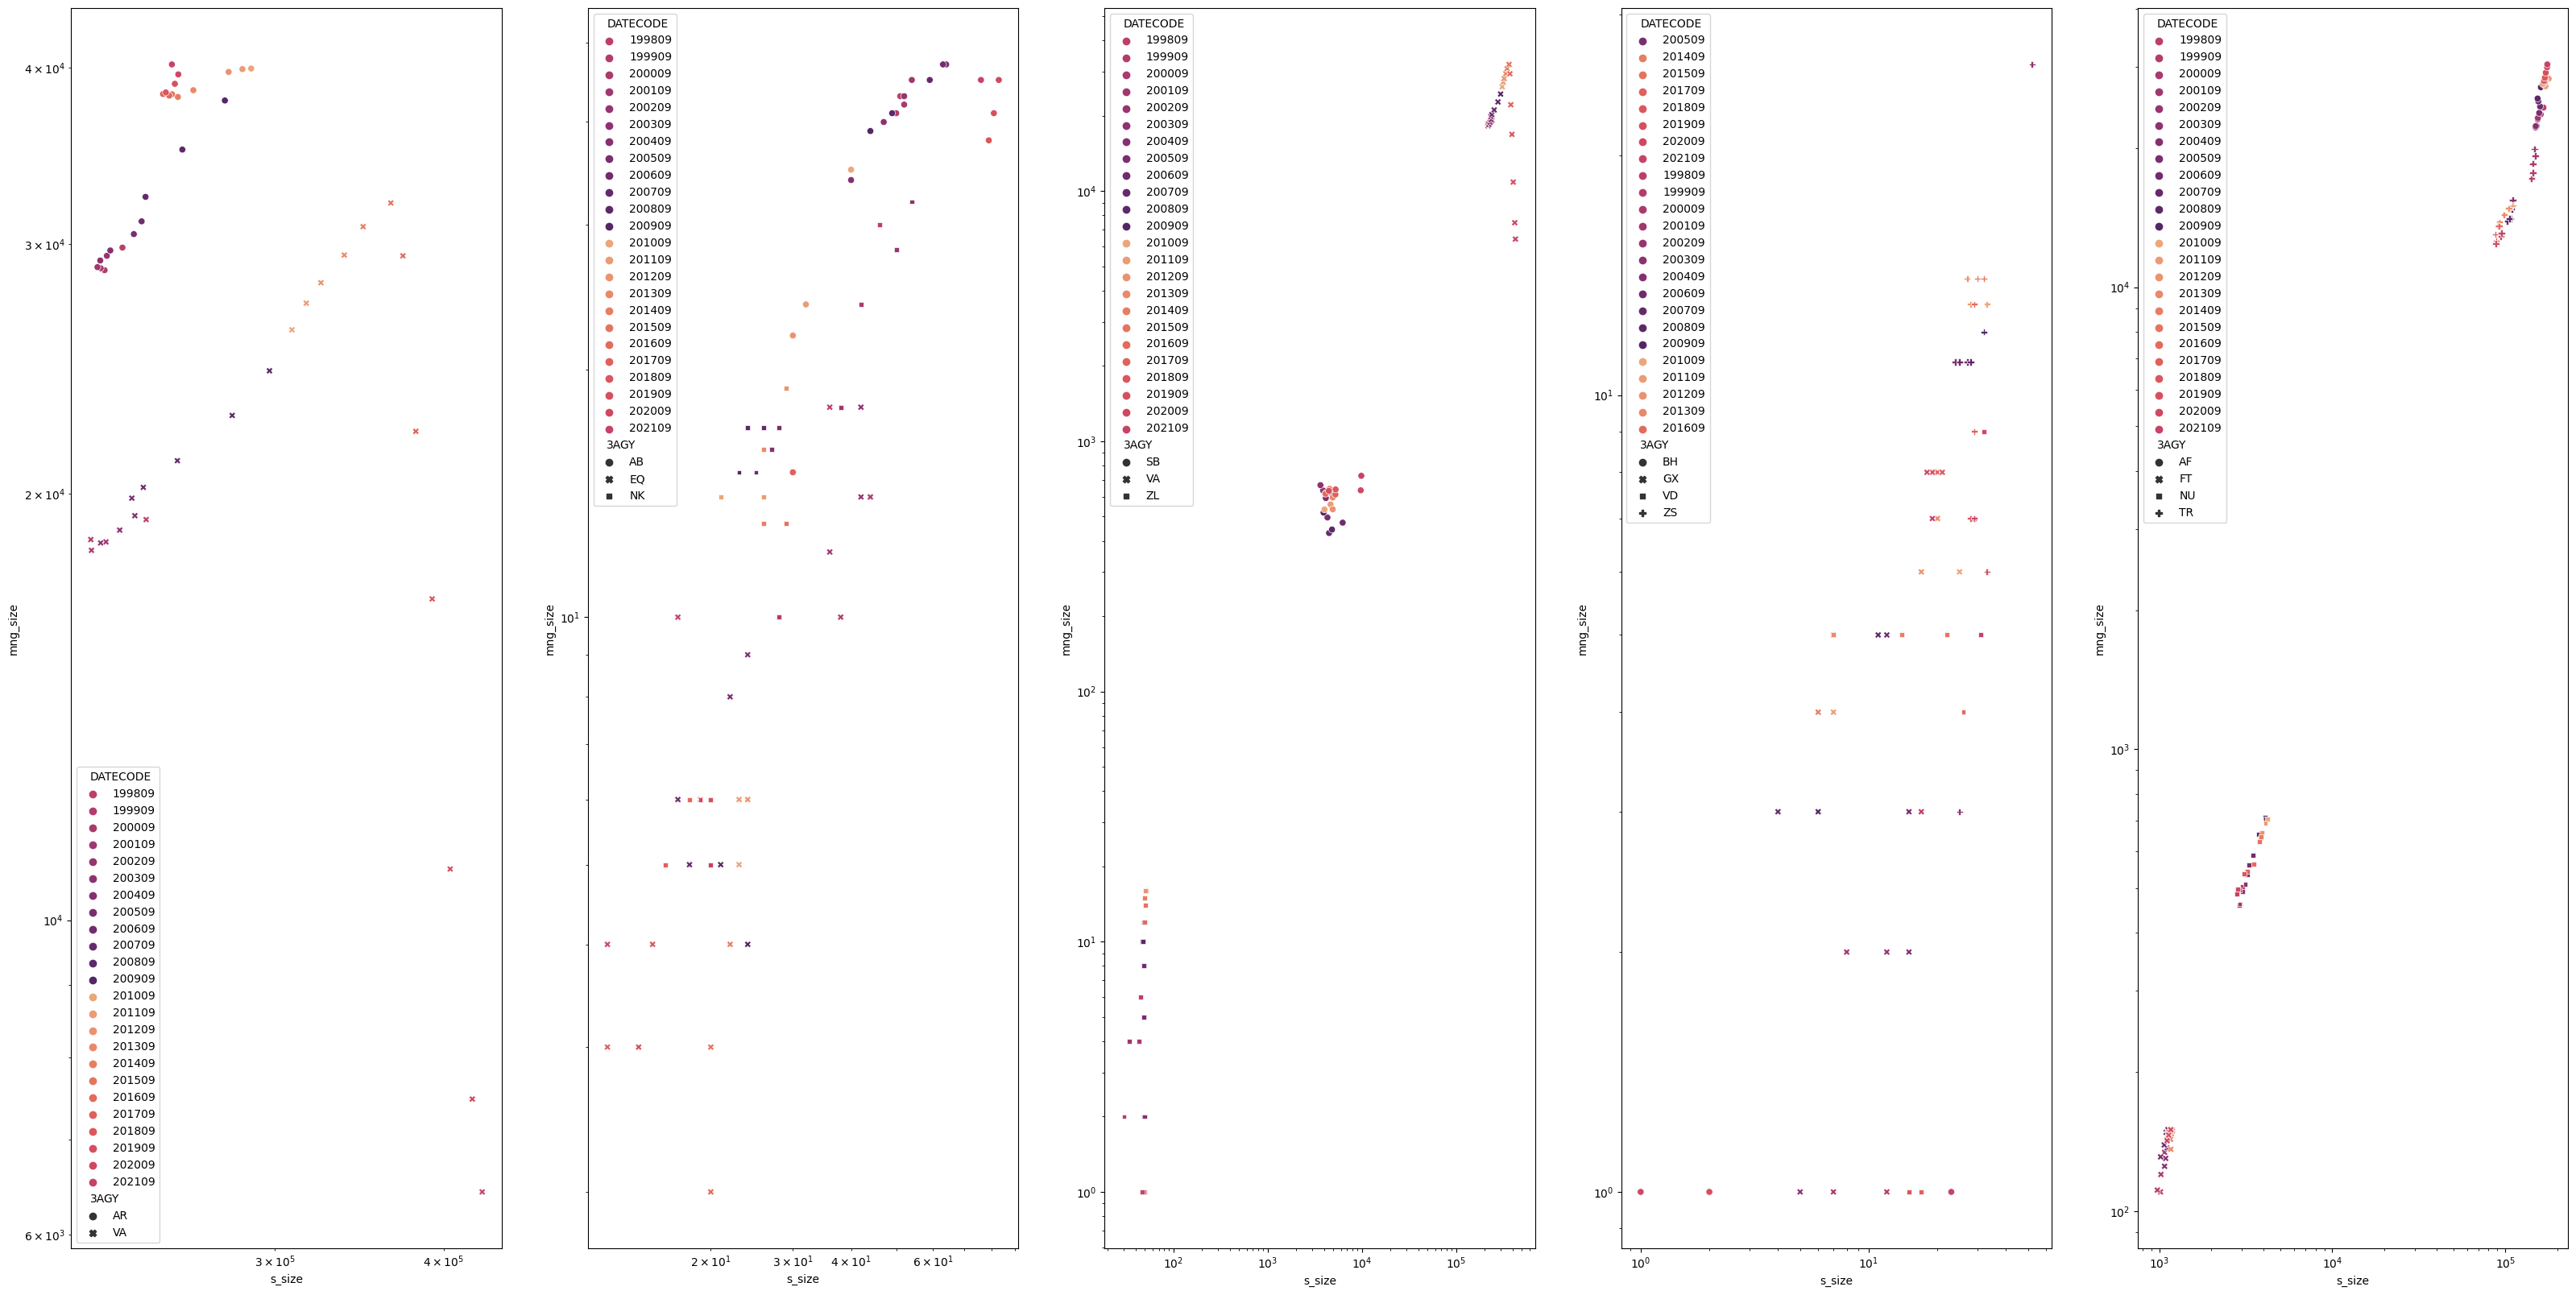

<Figure size 640x480 with 0 Axes>

In [21]:
scale_plot(df,'by_ts')

In [14]:
df

,3AGY,DATECODE,s_size,5is_mng,reg_frac,mng_size
0,AA,201009,11,2,0.181818,2.0
1,AA,201109,13,3,0.230769,3.0
2,AA,201209,15,2,0.133333,2.0
3,AA,201309,15,3,0.200000,3.0
4,AA,201409,17,3,0.176471,3.0
...,...,...,...,...,...,...
2917,ZU,202109,1,0,0.000000,0.0
2918,ZW,200209,23,17,0.739130,17.0
2919,ZW,200309,28,17,0.607143,17.0
2920,ZW,200409,21,15,0.714286,15.0


In [159]:
df = pd.read_pickle("checking_in.pkl")
df['DATECODE'] = pd.to_datetime(df['DATECODE'], format="%Y%m")
df['s_']
df.to_pickle('checking_in.pkl')

In [163]:

df.to_pickle('checking_in.pkl')

In [173]:
df

,3AGY,DATECODE,s_size,5is_mng,reg_frac,is_sbot0.1,mng_size
0,AA,2010-09-01 00:00:00,11,2,0.181818,False,2.0
1,AA,2011-09-01 00:00:00,13,3,0.230769,False,3.0
2,AA,2012-09-01 00:00:00,15,2,0.133333,False,2.0
3,AA,2013-09-01 00:00:00,15,3,0.200000,False,3.0
4,AA,2014-09-01 00:00:00,17,3,0.176471,False,3.0
...,...,...,...,...,...,...,...
2917,ZU,2021-09-01 00:00:00,1,0,0.000000,False,0.0
2918,ZW,2002-09-01 00:00:00,23,17,0.739130,False,17.0
2919,ZW,2003-09-01 00:00:00,28,17,0.607143,False,17.0
2920,ZW,2004-09-01 00:00:00,21,15,0.714286,False,15.0


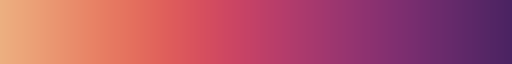

In [185]:
colors

In [187]:
dates

array([Timestamp('2010-09-01 00:00:00'), Timestamp('2011-09-01 00:00:00'),
       Timestamp('2012-09-01 00:00:00'), Timestamp('2013-09-01 00:00:00'),
       Timestamp('2014-09-01 00:00:00'), Timestamp('2015-09-01 00:00:00'),
       Timestamp('2016-09-01 00:00:00'), Timestamp('2017-09-01 00:00:00'),
       Timestamp('2018-09-01 00:00:00'), Timestamp('2019-09-01 00:00:00'),
       Timestamp('2020-09-01 00:00:00'), Timestamp('2021-09-01 00:00:00'),
       Timestamp('1998-09-01 00:00:00'), Timestamp('1999-09-01 00:00:00'),
       Timestamp('2000-09-01 00:00:00'), Timestamp('2001-09-01 00:00:00'),
       Timestamp('2002-09-01 00:00:00'), Timestamp('2003-09-01 00:00:00'),
       Timestamp('2004-09-01 00:00:00'), Timestamp('2005-09-01 00:00:00'),
       Timestamp('2006-09-01 00:00:00'), Timestamp('2007-09-01 00:00:00'),
       Timestamp('2008-09-01 00:00:00'), Timestamp('2009-09-01 00:00:00')],
      dtype=object)

In [188]:
df = pd.read_pickle("checking_in.pkl")
df['DATECODE'] = df['DATECODE'].astype('object')
dates = df['DATECODE'].unique()
colors = sns.color_palette("flare", as_cmap=True,n_colors=len(dates))
palette={date: [*color, 1.0] for date, color in zip(dates, colors)} #color and transparent
space_resol_angle = dict(
    # top1=['VA', 'AR'],
    # high_freq = ['VD'],
    # low_freq = ['AF'],
    top1=['VA', 'AR'],
    # top5=['VA', 'AR', 'NV','AF','HS'],
    # high_reg_frac = ['AB', 'NK', 'EQ'],
    # low_reg_frac = ['ZL', 'VA', 'SB'],
    # high_freq = ['VD', 'GX', 'BH', 'ZS'],
    # low_freq = ['AF', 'TR', 'NU', 'FT'], 
    # theor_responsive = ['NN', 'NF', 'JL', 'HB']
    )
for i, agg in enumerate(space_resol_angle.values()):
    df_by_ts = df[df['3AGY'].isin(agg)]
    df_by_ts['mng_size'] = df_by_ts['s_size'] * df_by_ts['reg_frac'] 
    fig, ax = plt.subplots(1,1, figsize = (20,10))
    ax.tick_params(axis='x', rotation=45)
    ax.set(xscale="log", yscale="log")
    sns.scatterplot(df_by_ts, x='s_size', y='mng_size',hue='DATECODE', style = '3AGY', ax =ax, palette=palette)

TypeError: 'ListedColormap' object is not iterable

In [183]:
colors = sns.color_palette("flare", as_cmap=True,n_colors=len(dates))
palette={date: [*color, 1.0] for date, color in zip(dates, colors)} #color and transparent
df = pd.read_pickle("checking_in.pkl")
#df['DATECODE']= df['DATECODE'].astype('int')
df['mng_size'] = df['s_size'] * df['reg_frac'] 
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.tick_params(axis='x', rotation=45)
ax.set(xscale="log", yscale="log")
sns.scatterplot(df[df['3AGY']=='AA'], x='s_size', y='mng_size', hue = 'DATECODE',style = '3AGY', ax =ax, palette=palette)

TypeError: 'ListedColormap' object is not iterable

<AxesSubplot: xlabel='s_size', ylabel='mng_size'>

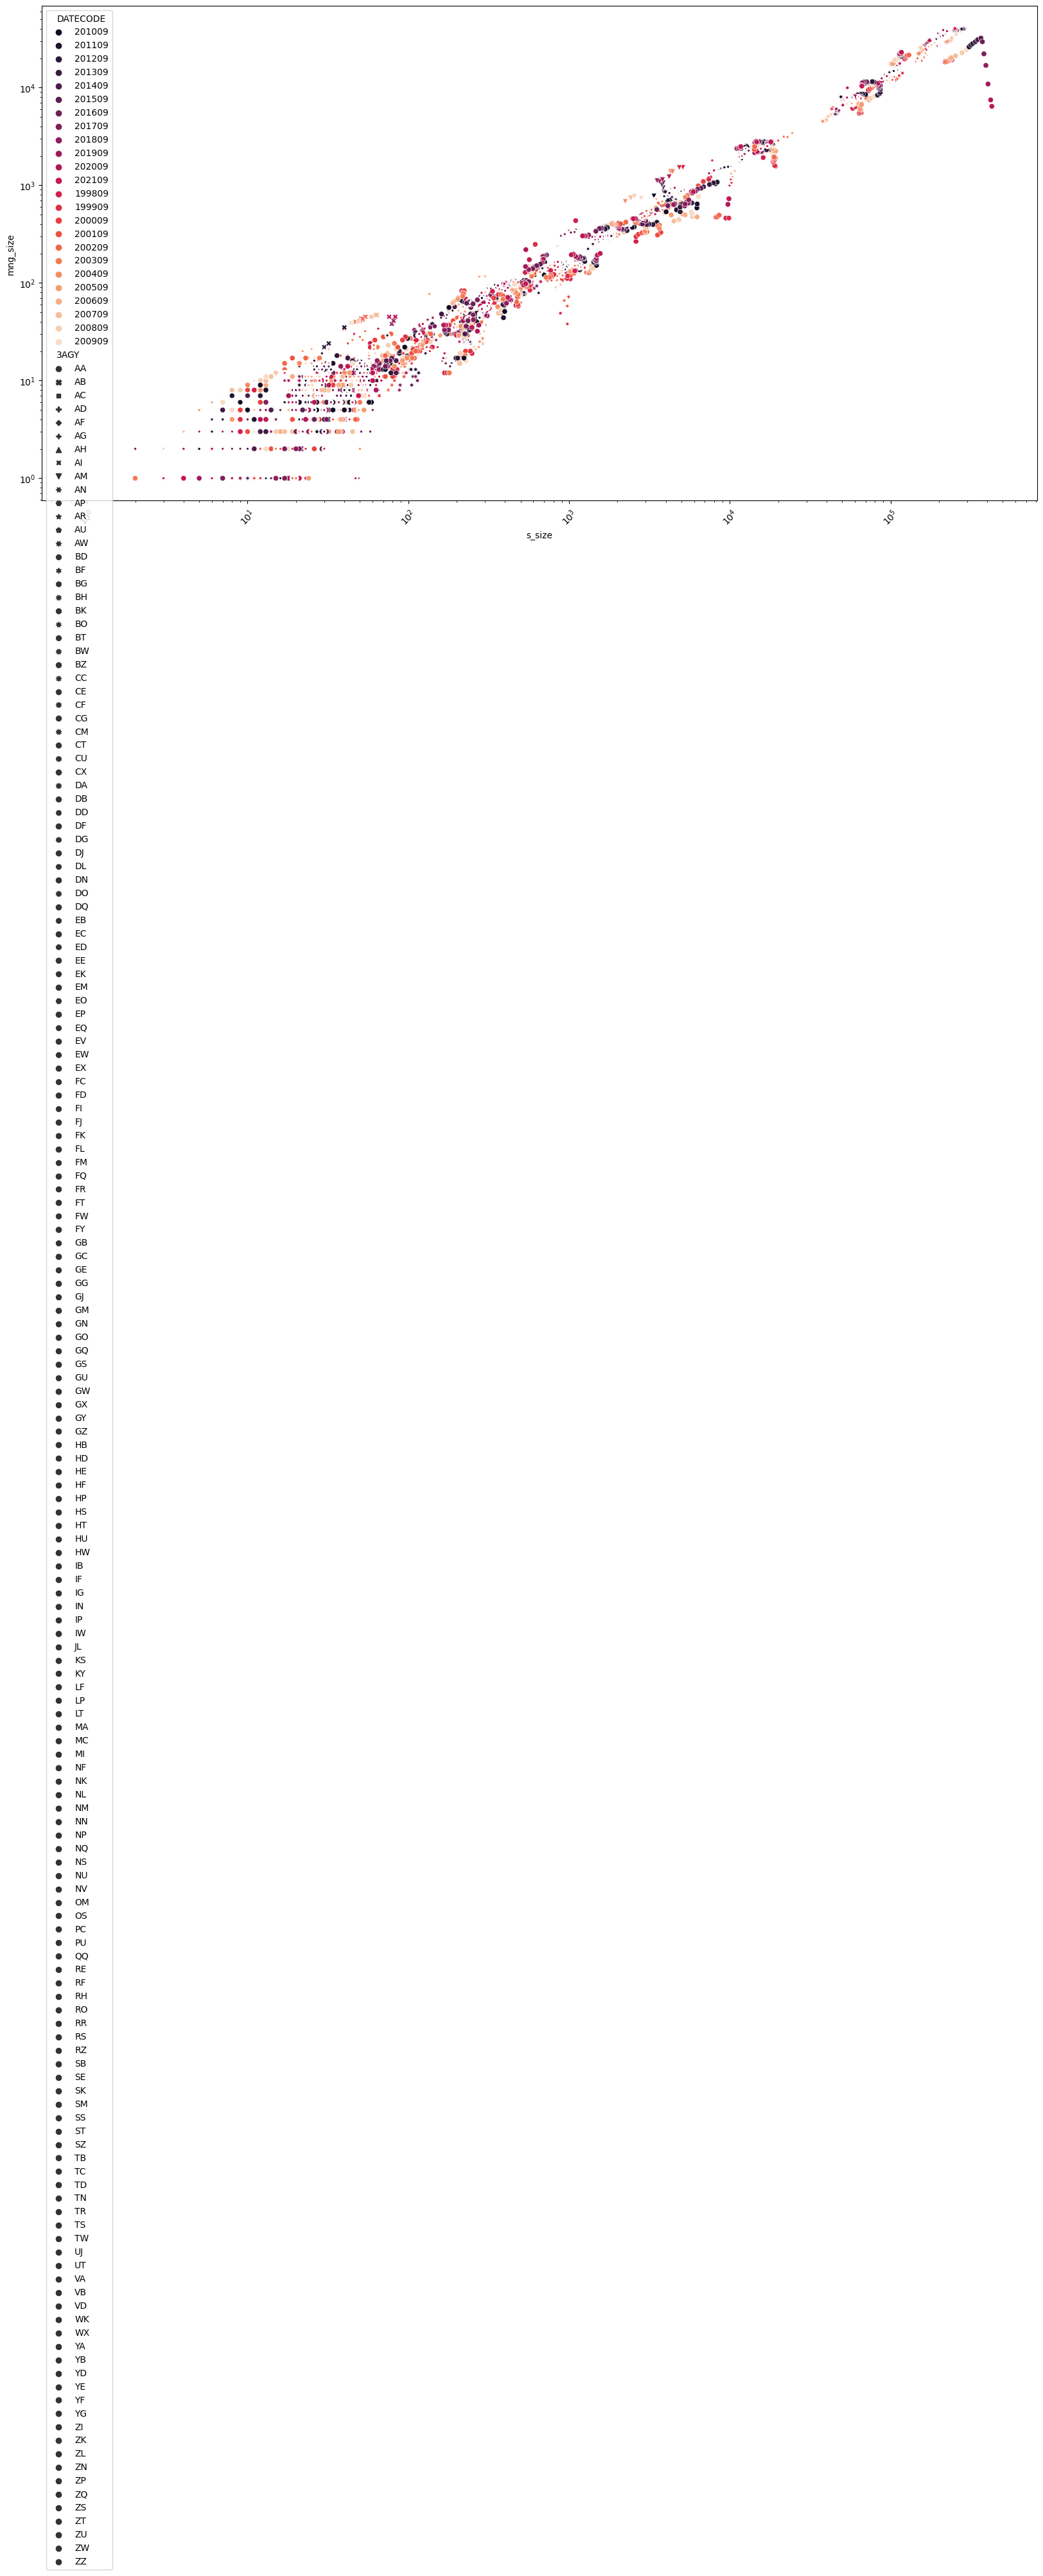

In [134]:
colors = sns.color_palette("rocket",n_colors=len(dates))
palette={date: [*color, 1.0] for date, color in zip(dates, colors)} #color and transparent
df = pd.read_pickle("checking_in.pkl")
#df['DATECODE']= df['DATECODE'].astype('int')
df['mng_size'] = df['s_size'] * df['reg_frac'] 
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.tick_params(axis='x', rotation=45)
ax.set(xscale="log", yscale="log")
sns.scatterplot(df, x='s_size', y='mng_size',hue='DATECODE', style = '3AGY', ax =ax, palette=palette)

NameError: name 'space_resol' is not defined

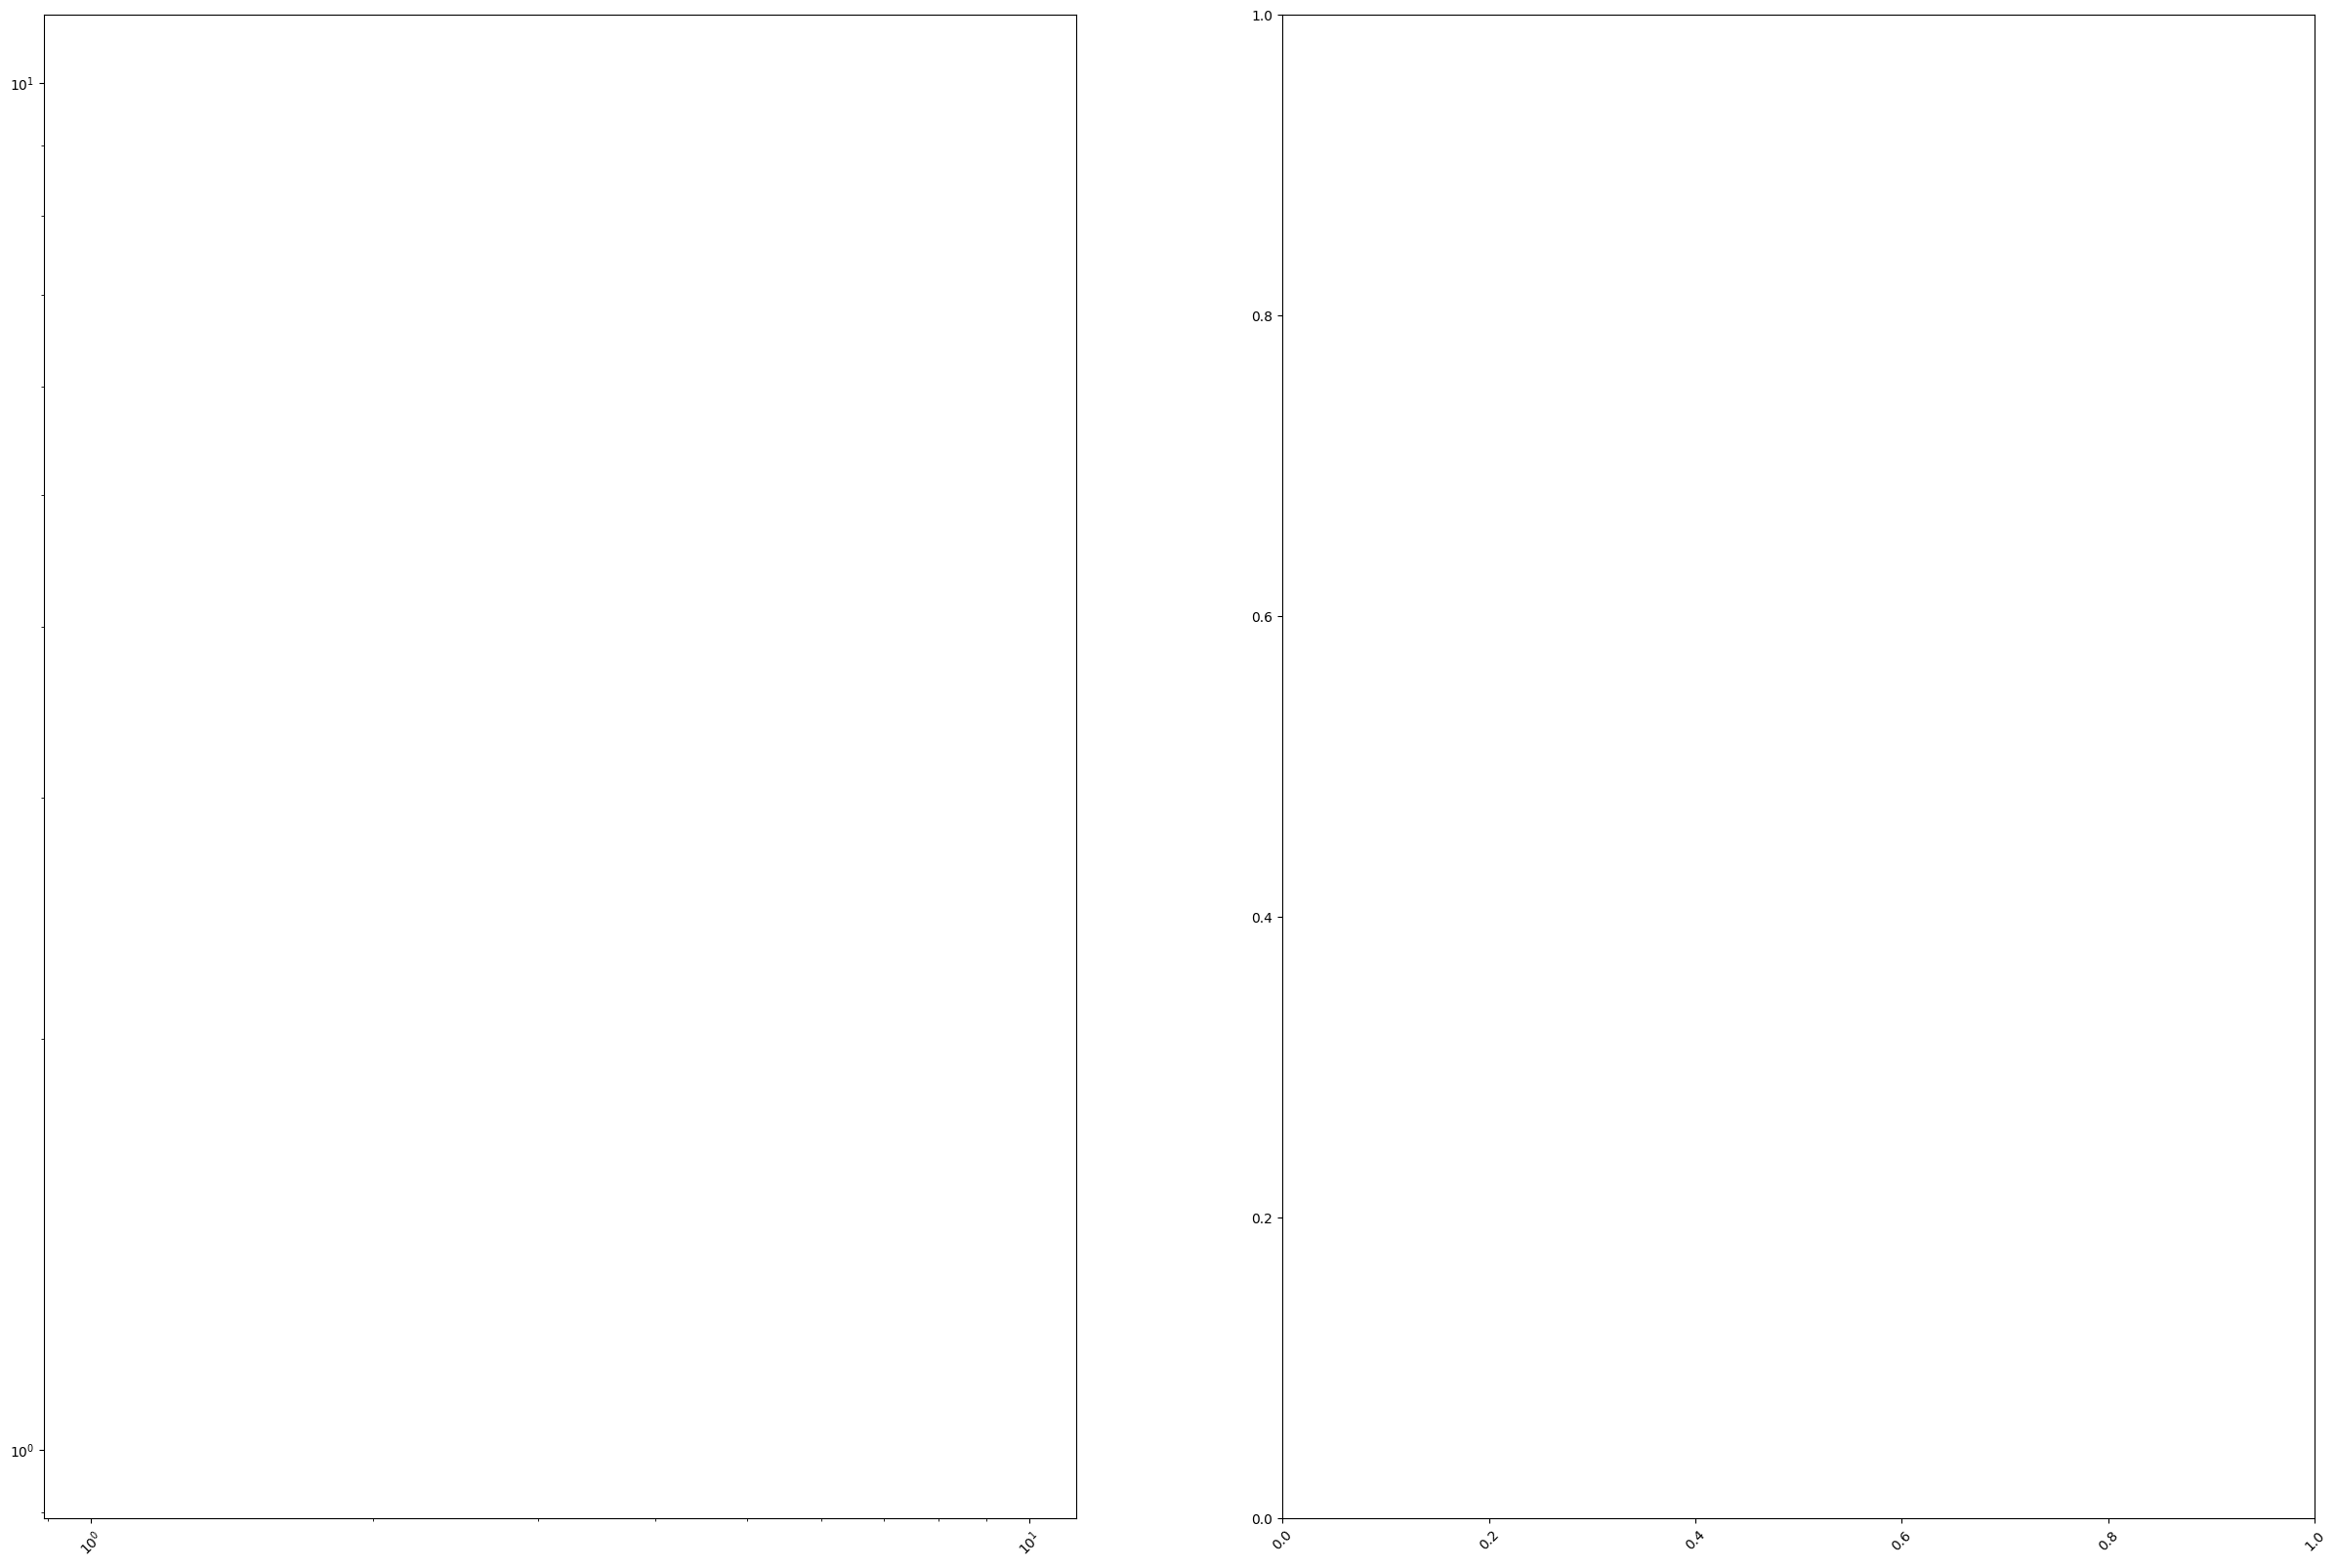

In [127]:
fig, axes = plt.subplots(1,2, figsize = (30,20))
# need groupby(space_resol), but seaborn provides "Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval:"
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[0].set(xscale="log", yscale="log")
sns.scatterplot(df[df[space_resol].isin(agg)],  x='s_size', y='reg_frac',hue='DATECODE', ax = axes[i])
sns.lineplot(df, x='s_size', y='mng_size', ax = axes[0]) # disagg by time = groupby space!
# sns.lineplot(df, x='DATECODE', y='s_size', ax = axes[1]) 

_, axes = plt.subplots(1, len(space_resol_angle), figsize=figsize)
plt.setp(axes, xlim = (10**5,5*10**6), ylim = (0,100))
for i, agg in enumerate(space_resol_angle.values()): 
    axes[i].set(xscale="log", yscale="log")
    sns.scatterplot(df[df[space_resol].isin(agg)],  x='s_size', y='reg_frac', ax = axes[i])

TypeError: 'AxesSubplot' object is not subscriptable

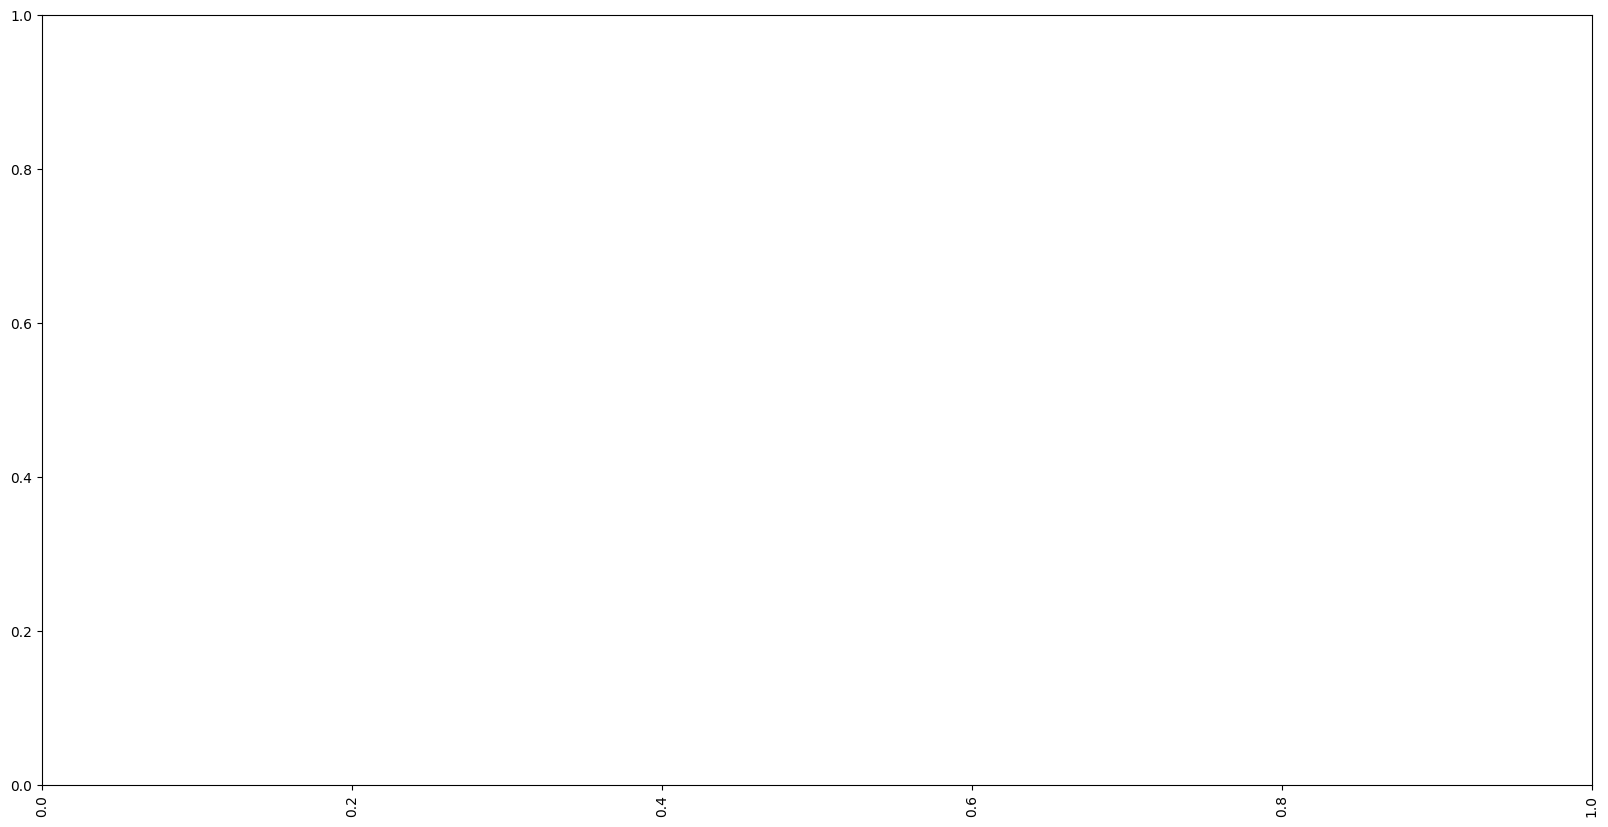

In [61]:
fig, axes = plt.subplots(1,1, figsize  = (20,10))
plt.xticks(rotation=90)

sns.lineplot(df[df['3AGY'] == 'VA'], x = 'DATECODE', y = 'reg_frac', ax = axes[0]) #veteran affairs blue
sns.lineplot(df[df['3AGY'] == 'AF'], x = 'DATECODE', y = 'reg_frac', ax = axes[0]) # orange
sns.lineplot(df[df['3AGY'] == 'ED'], x = 'DATECODE', y = 'reg_frac', ax = axes[1])
sns.lineplot(df[df['3AGY'] == 'AB'], x = 'DATECODE', y = 'reg_frac', ax = axes[1]) #TRADE AND DEVELOPMENT AGENCY',
sns.lineplot(df[df['3AGY'] == 'NK'], x = 'DATECODE', y = 'reg_frac', ax = axes[1])
sns.lineplot(df[df['3AGY'] == 'EQ'], x = 'DATECODE', y = 'reg_frac', ax = axes[1])
sns.lineplot(df[df['3AGY'] == 'NN'], x = 'DATECODE', y = 'reg_frac', ax = axes[1])


In [113]:
df.DATECODE = df.DATECODE.astype('int')

In [123]:
df[df['3AGY'].isin(high_reg)]

,3AGY,DATECODE,s_size,5is_mng,reg_frac,is_sbot0.1
12,AB,199809,51,43,0.843137,False
13,AB,199909,50,41,0.820000,False
14,AB,200009,52,42,0.807692,False
15,AB,200109,54,45,0.833333,False
16,AB,200209,52,43,0.826923,False
...,...,...,...,...,...,...
1976,NK,201709,16,5,0.312500,False
1977,NK,201809,20,6,0.300000,False
1978,NK,201909,20,6,0.300000,False
1979,NK,202009,19,6,0.315789,False


<AxesSubplot: xlabel='DATECODE', ylabel='reg_frac'>

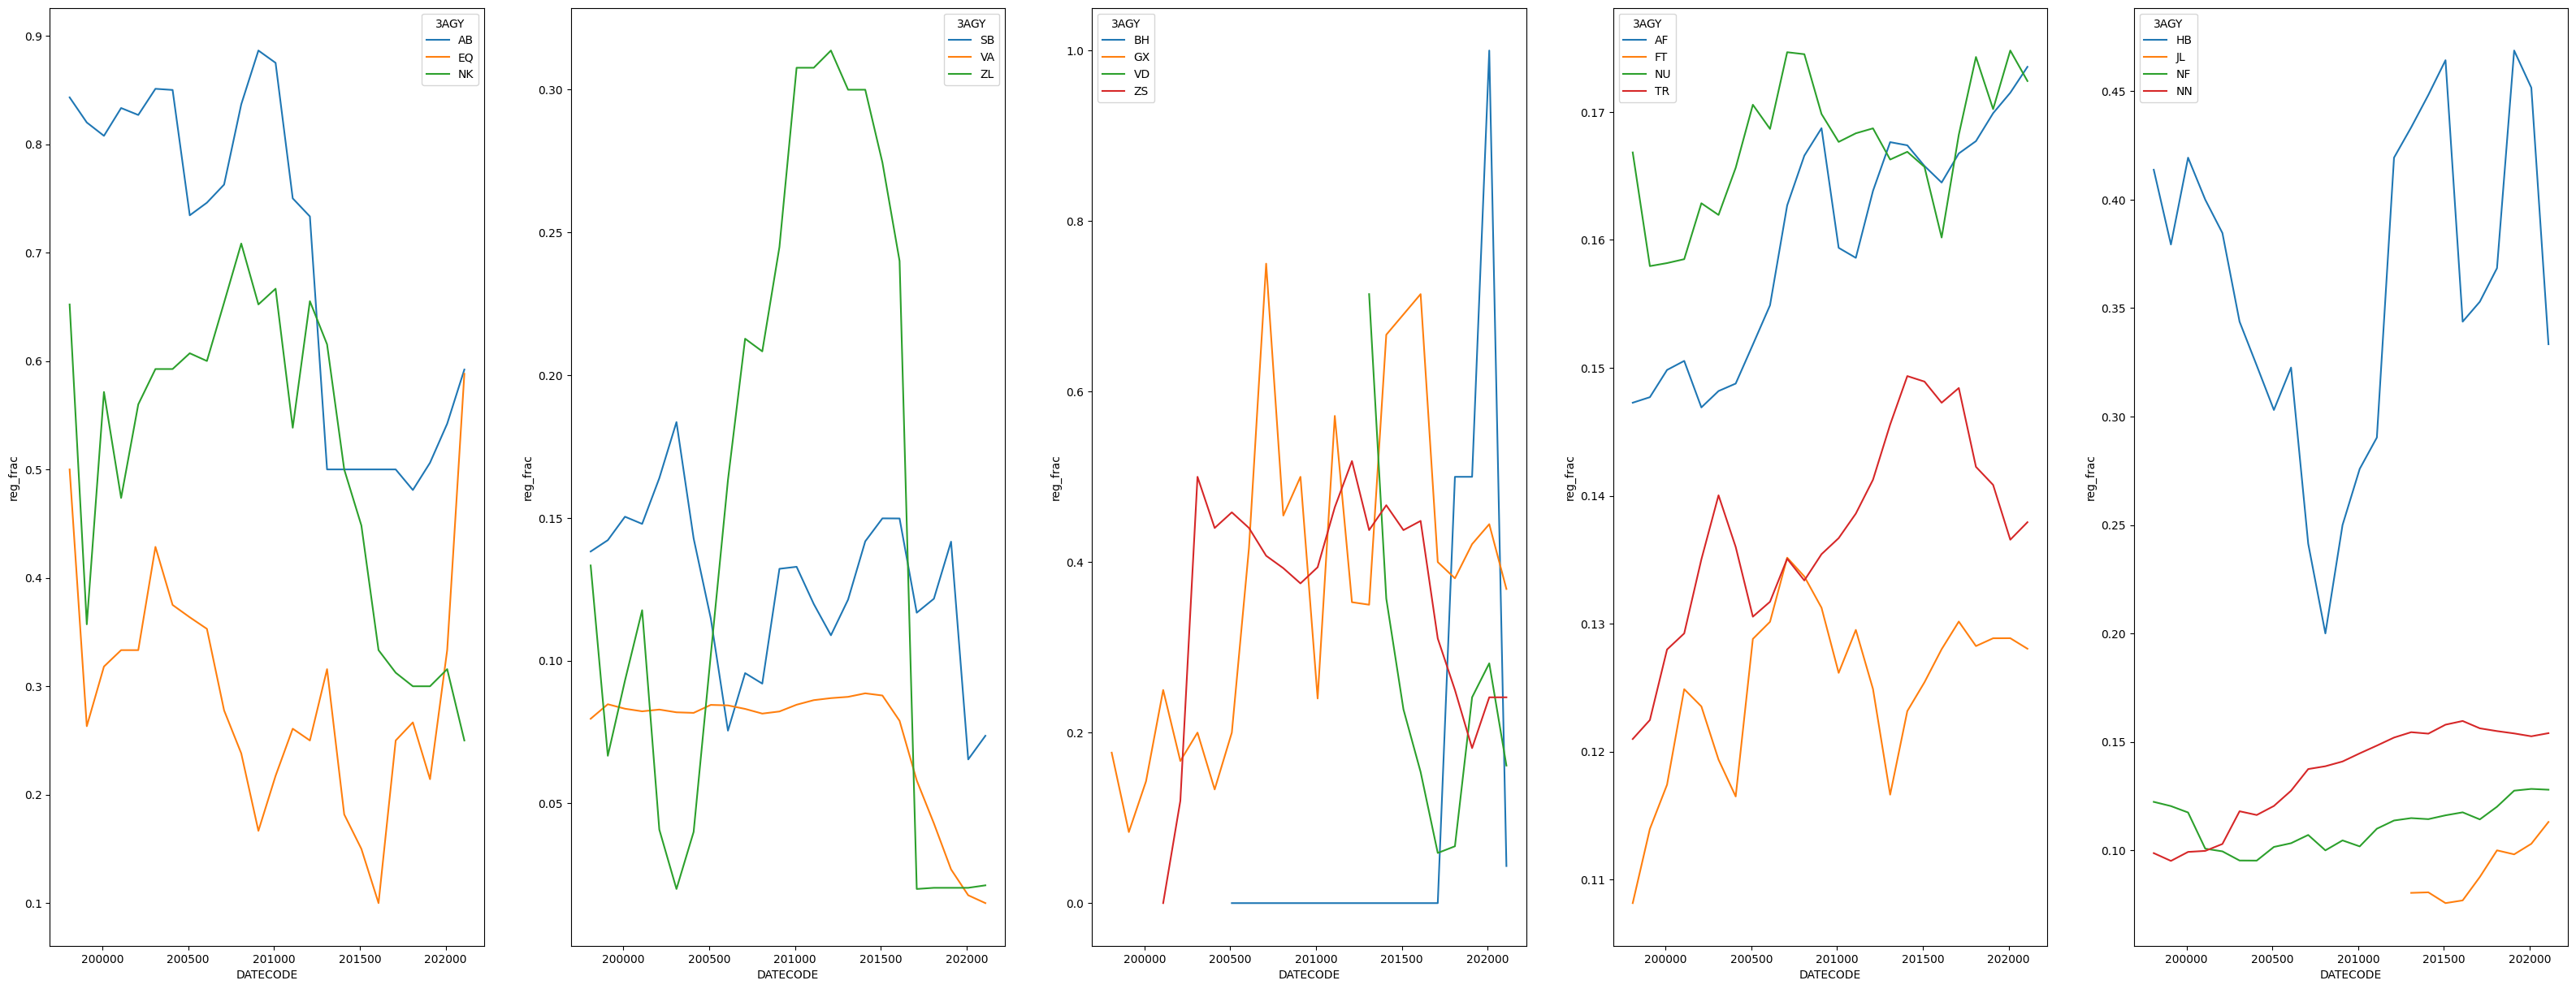

<AxesSubplot: xlabel='DATECODE', ylabel='s_size'>

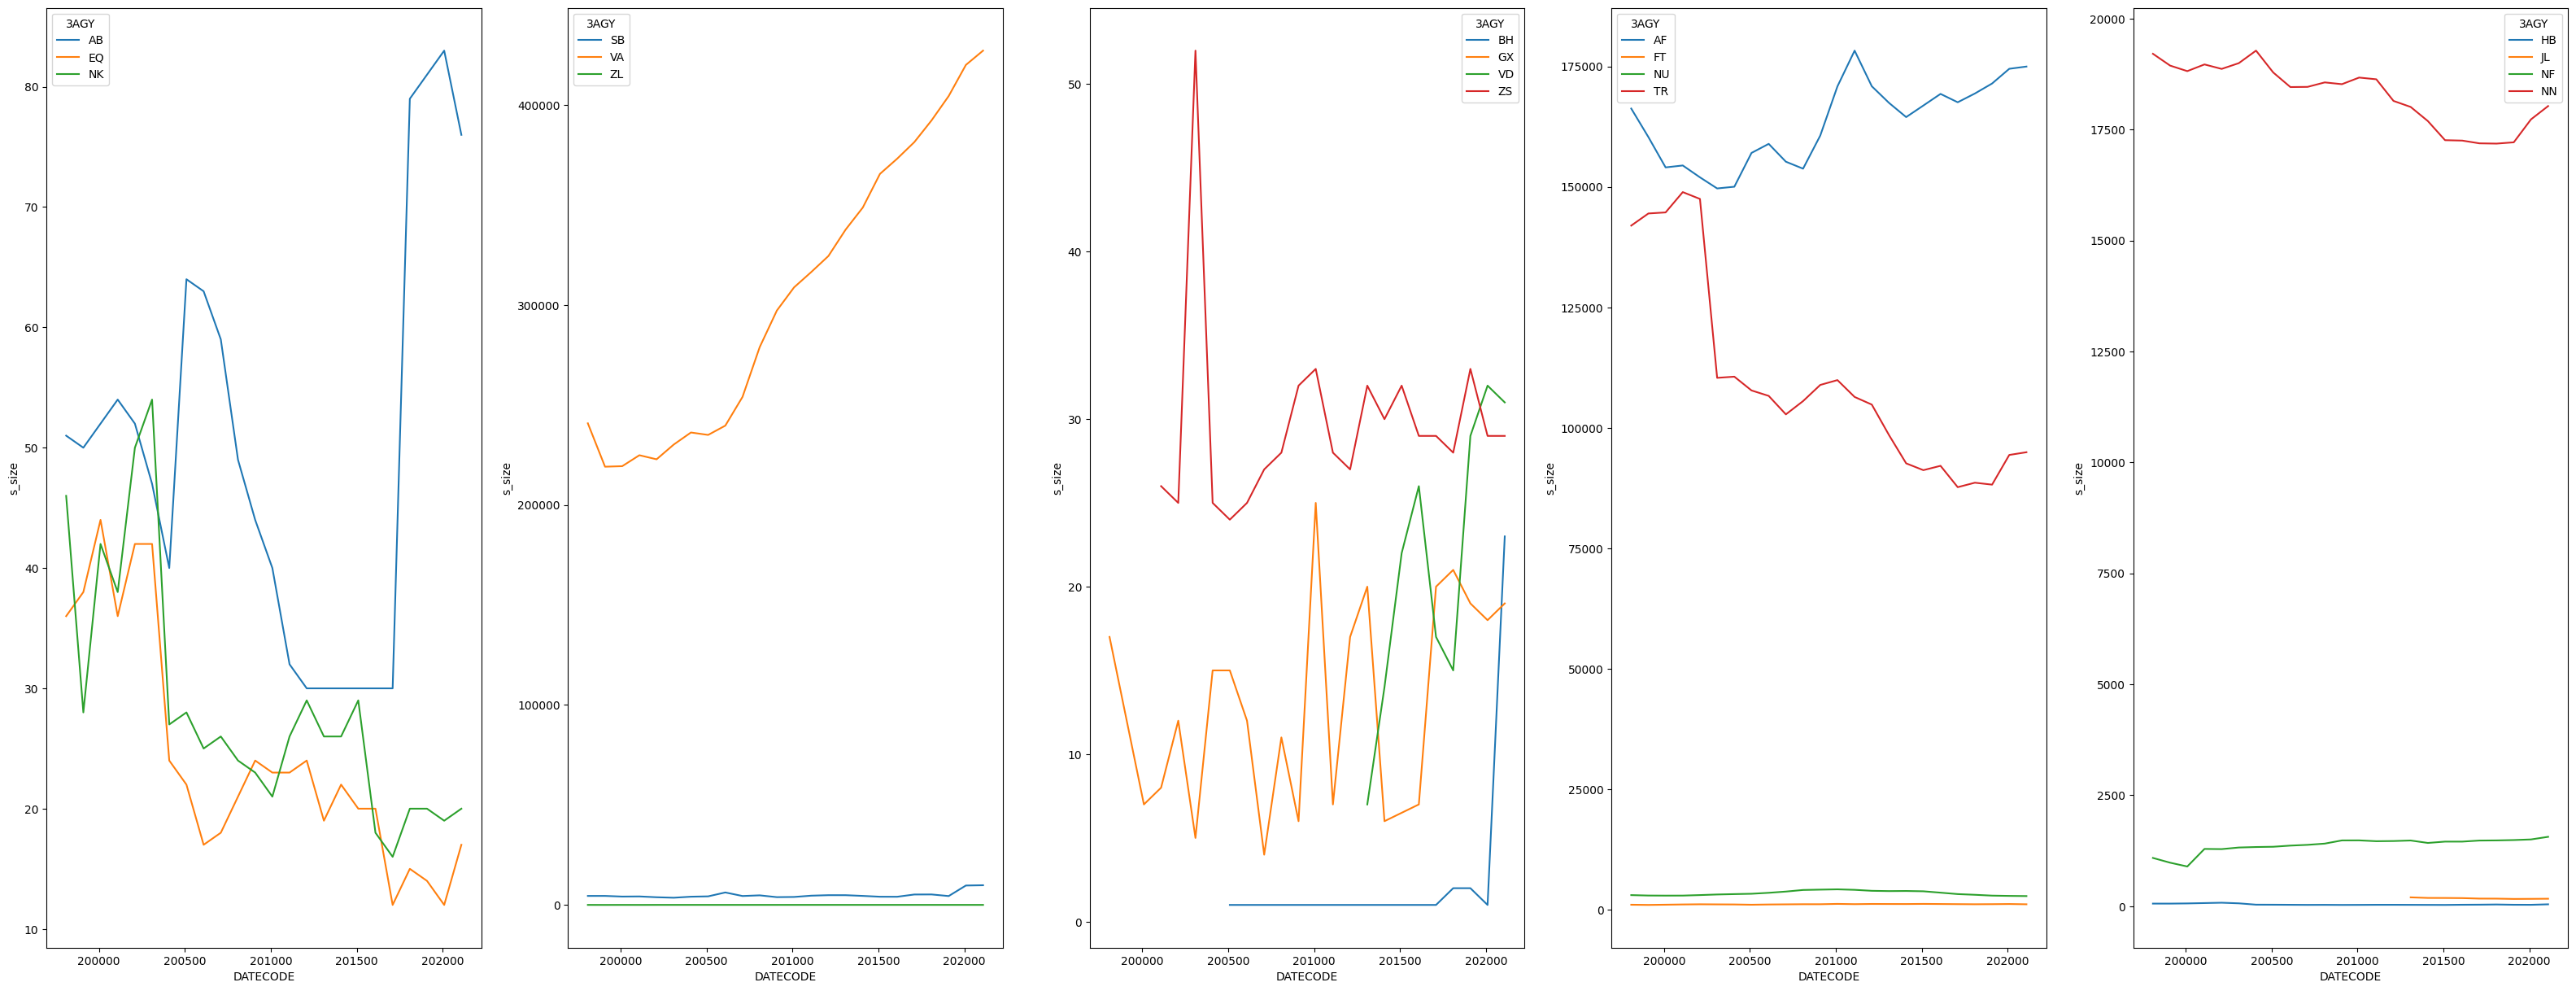

In [135]:
fig, axes = plt.subplots(1,5, figsize  = (40,15))
sns.lineplot(df[df['3AGY'].isin(high_reg_frac)], x = 'DATECODE', y = 's_size', ax = axes[0], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(low_reg_frac)], x = 'DATECODE', y = 's_size', ax = axes[1], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(high_freq)], x = 'DATECODE', y = 's_size', ax = axes[2], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(low_freq)], x = 'DATECODE', y = 's_size', ax = axes[3], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(theor_responsive)], x = 'DATECODE', y = 's_size', ax = axes[4], hue = '3AGY')

<AxesSubplot: xlabel='DATECODE', ylabel='5is_mng'>

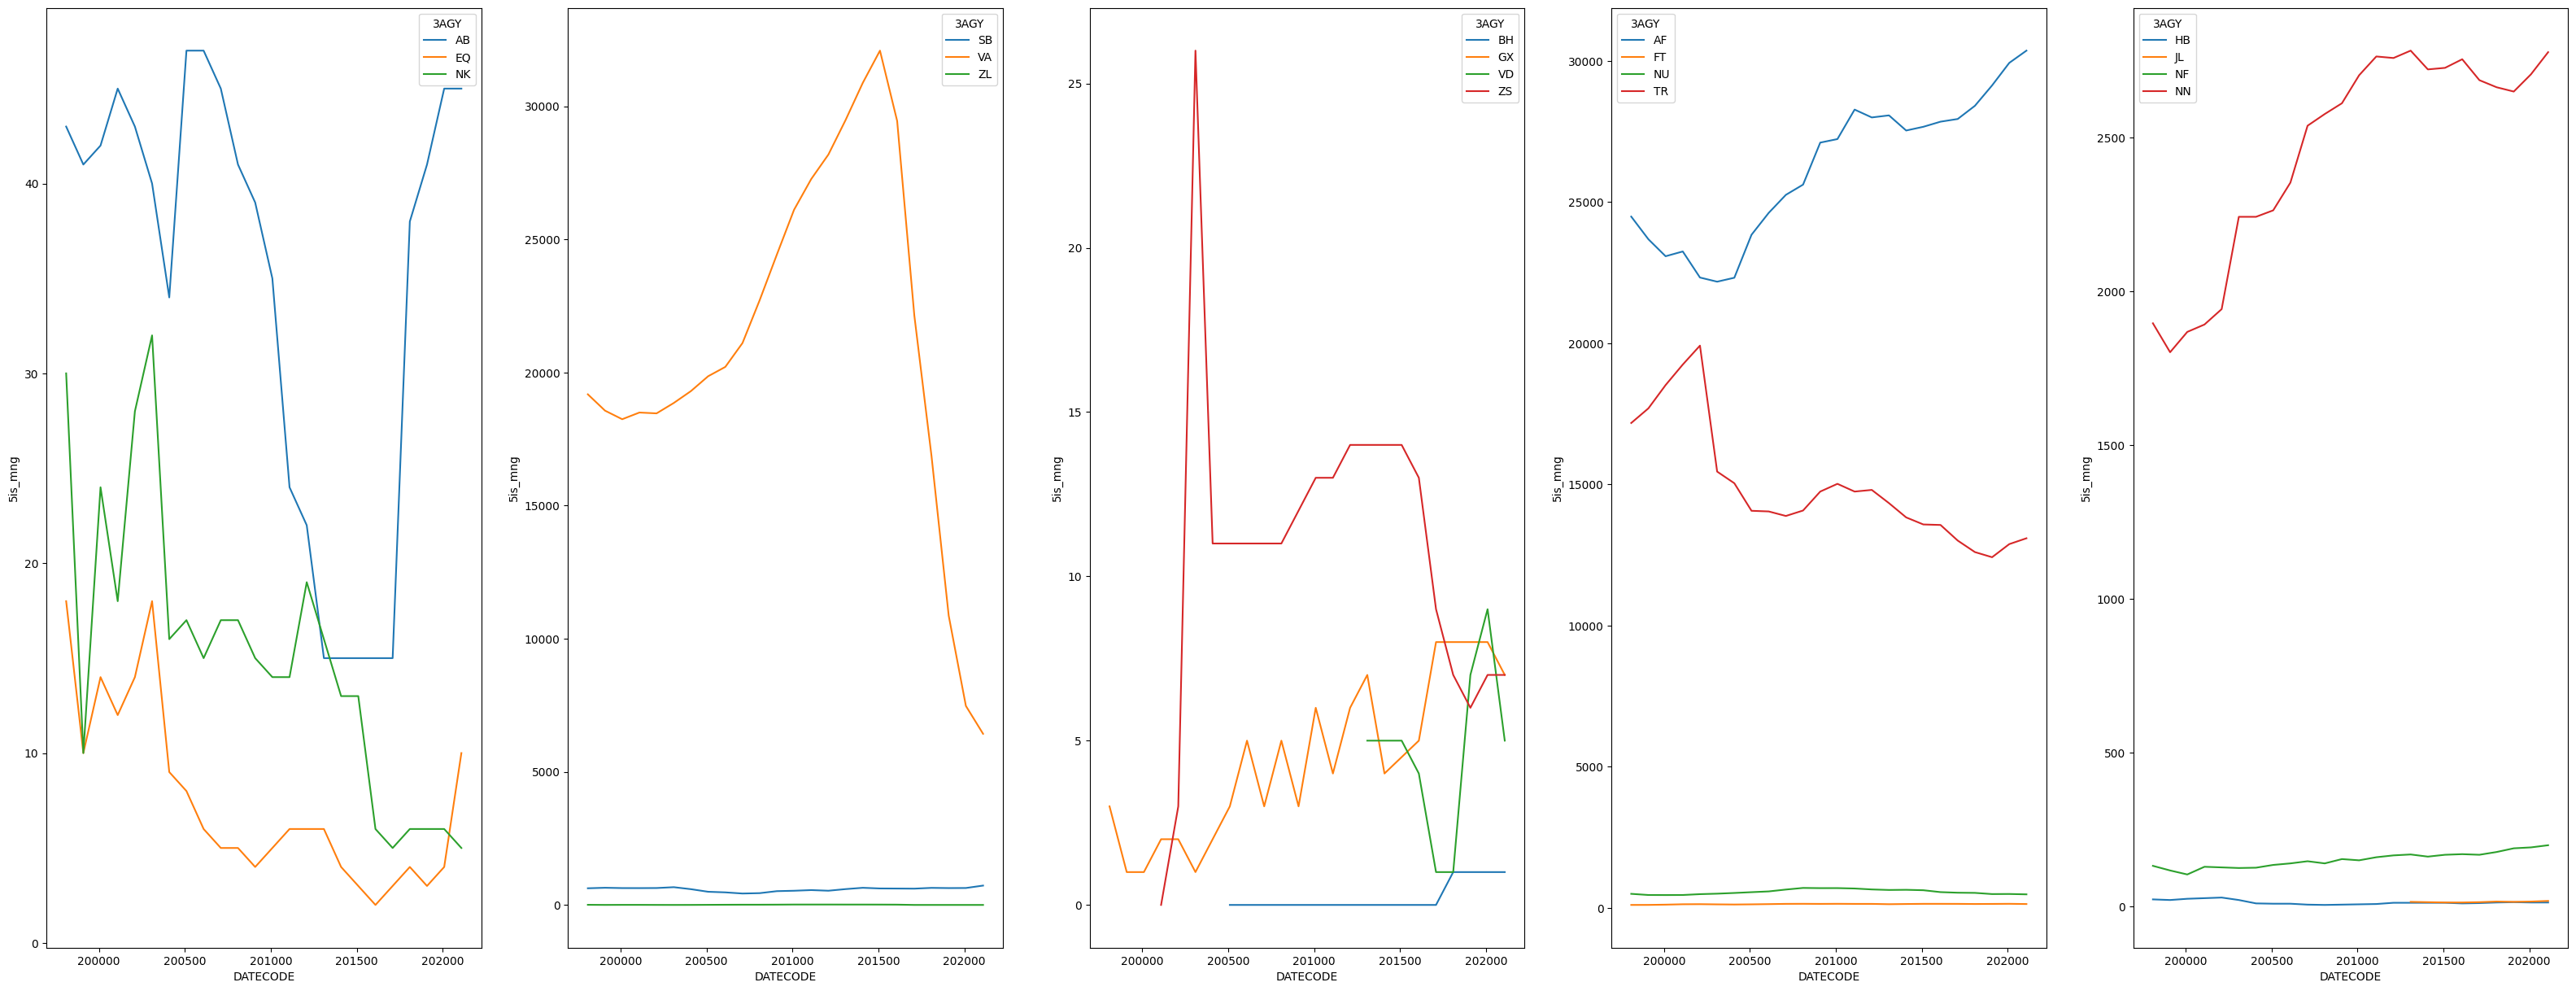

In [136]:
fig, axes = plt.subplots(1,5, figsize  = (40,15))
sns.lineplot(df[df['3AGY'].isin(high_reg_frac)], x = 'DATECODE', y = '5is_mng', ax = axes[0], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(low_reg_frac)], x = 'DATECODE', y = '5is_mng', ax = axes[1], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(high_freq)], x = 'DATECODE', y = '5is_mng', ax = axes[2], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(low_freq)], x = 'DATECODE', y = '5is_mng', ax = axes[3], hue = '3AGY')
sns.lineplot(df[df['3AGY'].isin(theor_responsive)], x = 'DATECODE', y = '5is_mng', ax = axes[4], hue = '3AGY')

In [99]:
df[df['3AGY']=='DG']

,3AGY,DATECODE,s_size,5is_mng,reg_frac,is_sbot0.1
678,DG,201009,1,1,1.000000,False
679,DG,201109,1,1,1.000000,False
680,DG,201209,1,1,1.000000,False
681,DG,201309,1,1,1.000000,False
682,DG,201409,2,1,0.500000,False
683,DG,201509,3,1,0.333333,False
684,DG,201609,3,1,0.333333,False
685,DG,201709,3,1,0.333333,False
686,DG,201809,2,0,0.000000,False
687,DG,201909,5,1,0.200000,False


In [ ]:
ag = df.groupby('3AGY').count()

In [107]:
df[df['3AGY'].isin(df.groupby('3AGY').reg_frac.std().dropna().sort_values()[-10:].index) & (df.s_size>10)]

,3AGY,DATECODE,s_size,5is_mng,reg_frac,is_sbot0.1
342,BH,202109,23,1,0.043478,False
640,DB,201609,11,0,0.000000,False
641,DB,201709,12,0,0.000000,False
642,DB,201809,12,0,0.000000,False
1439,GX,199809,17,3,0.176471,False
1440,GX,199909,12,1,0.083333,False
1443,GX,200209,12,2,0.166667,False
1445,GX,200409,15,2,0.133333,False
1446,GX,200509,15,3,0.200000,False
1447,GX,200609,12,5,0.416667,False


In [ ]:
# space_resol = '3AGY'
# sorted_state = df.groupby(space_resol)['EMPLOYMENT'].count().sort_values()
# s_state = sorted_state[:int(164*.1)]
df1 = df.assign(is_sbot = lambda x: x[space_resol].isin(s_state.index))

In [ ]:
tq = .1
df = df.iloc[(np.where(~df[space_resol].isin(s_state.index)))]  

In [ ]:
s_state

In [ ]:
df[df['3AGY']=='YE']

In [ ]:
df

In [ ]:
df.where(df['3AGY'].isin(s_state.index))

In [ ]:
df.iloc[np.where(~df['3AGY'].isin(s_state.index)), f'is_rtop{tq}'] = 'True'

In [ ]:
s_state = sorted_state[:int(164*.1)]
s_state.index

In [ ]:
df['3AGY'].str.contains(s_state)

In [ ]:
df1.is_sbot.unique()

In [ ]:
df[df. > np.percentile(df.a,95)]

In [ ]:
s_state

In [10]:
ag[ag.EMPLOYMENT<5].index

Index(['DA', 'DO', 'EV', 'GN', 'YG'], dtype='object', name='3AGY')

In [30]:
# space_resol = '3AGY'
# sorted_state = df.groupby(space_resol)['EMPLOYMENT'].count().sort_values()
# s_state = sorted_state[:int(164*.1)]
df1 = df.assign(is_sbot = lambda x: x[space_resol].isin(s_state.index))

In [31]:
df1

,DATECODE,SALARY,EMPLOYMENT,2AGYTYP,3AGY,4AGYSUB,5is_mng,is_sbot
0,199809,"$42,709",1,4,AB,AB00,True,False
1,199809,"$31,045",1,4,AB,AB00,True,False
2,199809,"$31,266",1,4,AB,AB00,False,False
3,199809,"$57,393",1,4,AB,AB00,True,False
4,199809,NaN,1,4,AB,AB00,True,False
...,...,...,...,...,...,...,...,...
2191006,202109,173074.0,1,4,ZS,ZS00,False,False
2191007,202109,57000.0,1,4,ZS,ZS00,False,False
2191008,202109,75500.0,1,4,ZS,ZS00,False,False
2191009,202109,41000.0,1,4,ZS,ZS00,False,False


In [53]:
tq = .1
df = df.iloc[(np.where(~df[space_resol].isin(s_state.index)))]  

In [55]:
s_state

3AGY
DO     1
GN     1
YG     1
DA     2
EV     3
IP     7
ZQ     7
ZN     7
YA    11
GU    11
WK    14
GZ    16
ZK    18
KY    18
AC    19
YE    22
Name: EMPLOYMENT, dtype: int64

In [56]:
df[df['3AGY']=='YE']

,DATECODE,SALARY,EMPLOYMENT,2AGYTYP,3AGY,4AGYSUB,5is_mng


In [52]:
df

,DATECODE,SALARY,EMPLOYMENT,2AGYTYP,3AGY,4AGYSUB,5is_mng
0,199809,"$42,709",1,4,AB,AB00,True
1,199809,"$31,045",1,4,AB,AB00,True
2,199809,"$31,266",1,4,AB,AB00,False
3,199809,"$57,393",1,4,AB,AB00,True
4,199809,NaN,1,4,AB,AB00,True
...,...,...,...,...,...,...,...
2191006,202109,173074.0,1,4,ZS,ZS00,False
2191007,202109,57000.0,1,4,ZS,ZS00,False
2191008,202109,75500.0,1,4,ZS,ZS00,False
2191009,202109,41000.0,1,4,ZS,ZS00,False


In [51]:
df.where(df['3AGY'].isin(s_state.index))

,DATECODE,SALARY,EMPLOYMENT,2AGYTYP,3AGY,4AGYSUB,5is_mng
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2191006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2191007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2191008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2191009,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.iloc[np.where(~df['3AGY'].isin(s_state.index)), f'is_rtop{tq}'] = 'True'

AssertionError: cannot find the length of the indexer

In [40]:
s_state = sorted_state[:int(164*.1)]
s_state.index

Index(['DO', 'GN', 'YG', 'DA', 'EV', 'IP', 'ZQ', 'ZN', 'YA', 'GU', 'WK', 'GZ',
       'ZK', 'KY', 'AC', 'YE'],
      dtype='object', name='3AGY')

In [18]:
df['3AGY'].str.contains(s_state)

TypeError: unhashable type: 'Series'

In [16]:
df1.is_sbot.unique()

array([False])

In [ ]:
df[df. > np.percentile(df.a,95)]

In [ ]:
s_state

In [109]:
xr_lst = []
for TIME_YEAR in TIME_YEARS:
    for TIME_MONTH in TIME_MONTHS:
        hierarchize_org(TIME_YEAR + TIME_MONTH, features)
        xr_lst.append(pd.read_pickle(get_data_path(f'agency/{TIME_YEAR + TIME_MONTH}') + f'/{features}.pkl').to_xarray())
#total: 47,546,547 (47m)
agency98_21 = xr.concat([xr for xr in xr_lst], dim = "index")

In [184]:
agency98_21
# how to treat manager and nonmanager of one agency as one homogenous unit

<xarray.Dataset>
Dimensions:     (index: 47546547)
Coordinates:
  * index       (index) int64 0 1 2 3 4 ... 2191007 2191008 2191009 2191010
Data variables:
    DATECODE    (index) int64 199809 199809 199809 ... 202109 202109 202109
    SALARY      (index) object '$42,709' '$31,045' ... 41000.0 170800.0
    EMPLOYMENT  (index) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    2AGYTYP     (index) int64 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    3AGY        (index) object 'AB' 'AB' 'AB' 'AB' 'AB' ... 'ZS' 'ZS' 'ZS' 'ZU'
    4AGYSUB     (index) object 'AB00' 'AB00' 'AB00' ... 'ZS00' 'ZS00' 'ZU00'
    5is_mng     (index) bool True True False True ... False False False False

In [172]:
a = xr_lst[0].isel(index = slice(0,10)) # use dictionary (left, right) both string, use kwarg (left) is never string (passing dims as kwargs)

In [171]:
b = xr_lst[1].isel(index = slice(0,9))

In [177]:
2020: a (4: 1, 3), bank-b (5: 2,3) 9

2021: a (3: 1,2), b (6:2,4),c (3: 1,2) 12

concat(20,21): index 21
(time, agy, agysub, is_mng, index) 
(20, a, 1, 1) 
(21, a, 0, 2)
(21, a, 0, 3) 
(21, a, 0, 4)
(21, b, 1, 5) 
4d array
each state has the same department (elements will be shared) - army and bank would have a,b,c element

time = 2020
agency army bank/sub_agency (a,b)
a [[1, 0],
b  [0, 2],
c  [0, 0]],
time = 2021
[[1, 0],
 [0, 2],
 [0, 1]] 
# groupby over agency and subagency
c = xr.concat([a,b], data_vars = '3AGY', dim = 'index') #four and two 

ValueError: unexpected value for data_vars: 3AGY

In [178]:
c

NameError: name 'c' is not defined

In [164]:
# agency types changed in 20 years
print([len(set(xr_lst[i]['3AGY'].values)) for i in range(23)])


[115, 111, 114, 115, 116, 115, 120, 120, 118, 119, 120, 122, 124, 126, 125, 126, 128, 125, 125, 125, 125, 128, 130]


In [182]:
agency98_21

<xarray.Dataset>
Dimensions:     (index: 47546547)
Coordinates:
  * index       (index) int64 0 1 2 3 4 ... 2191007 2191008 2191009 2191010
Data variables:
    DATECODE    (index) int64 199809 199809 199809 ... 202109 202109 202109
    SALARY      (index) object '$42,709' '$31,045' ... 41000.0 170800.0
    EMPLOYMENT  (index) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    2AGYTYP     (index) int64 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    3AGY        (index) object 'AB' 'AB' 'AB' 'AB' 'AB' ... 'ZS' 'ZS' 'ZS' 'ZU'
    4AGYSUB     (index) object 'AB00' 'AB00' 'AB00' ... 'ZS00' 'ZS00' 'ZU00'
    5is_mng     (index) bool True True False True ... False False False False

In [110]:
agency_bytime = agency98_21.groupby('DATECODE')
# Q1.from decreasing agytyp mean, (categorized into four as 1: 'Cabinet Level Agencies':  2: 'Large Independent Agencies (1000 or more employees)':  (categorized to 1-4 dep on absolute size) mean
# Q2.manager ratio peaked during 20s and is falling
mng_ratio = agency_bytime.mean() # 5is_mng count is the number of employee of each agency at each year - how to plot?
org_size = agency_bytime.count() # Employement count is the number of employee of each agency at each year - how to plot?

<xarray.Dataset>
Dimensions:     (DATECODE: 24)
Coordinates:
  * DATECODE    (DATECODE) int64 199809 199909 200009 ... 201909 202009 202109
Data variables:
    EMPLOYMENT  (DATECODE) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    2AGYTYP     (DATECODE) float64 1.117 1.119 1.116 1.116 ... 1.083 1.085 1.084
    5is_mng     (DATECODE) float64 0.1225 0.125 0.1262 ... 0.1361 0.1354 0.1344
<xarray.Dataset>
Dimensions:     (DATECODE: 24)
Coordinates:
  * DATECODE    (DATECODE) int64 199809 199909 200009 ... 201909 202009 202109
Data variables:
    SALARY      (DATECODE) int64 1809765 1772258 1760526 ... 1884189 1889613
    EMPLOYMENT  (DATECODE) int64 1818143 1779814 1767443 ... 2181106 2191011
    2AGYTYP     (DATECODE) int64 1818143 1779814 1767443 ... 2181106 2191011
    3AGY        (DATECODE) int64 1818143 1779814 1767443 ... 2181106 2191011
    4AGYSUB     (DATECODE) int64 1818143 1779814 1767443 ... 2181106 2191011
    5is_mng     (DATECODE) int64 1818143 1779814 1767443 ... 21

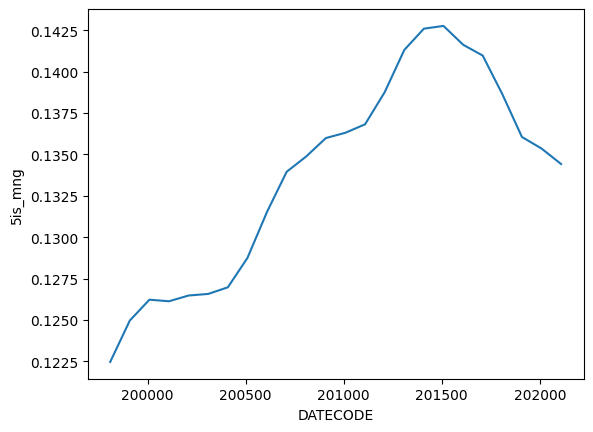

In [119]:
mng_ratio['5is_mng'].plot()

Federal agency size peak during 2010 https://en.wikipedia.org/wiki/Dodd%E2%80%93Frank_Wall_Street_Reform_and_Consumer_Protection_Act; 

- observation: nonmanager is mostly being laid off (25 (5, 20) -> 15 (4, 11))
- layoff time can be estimated
- 


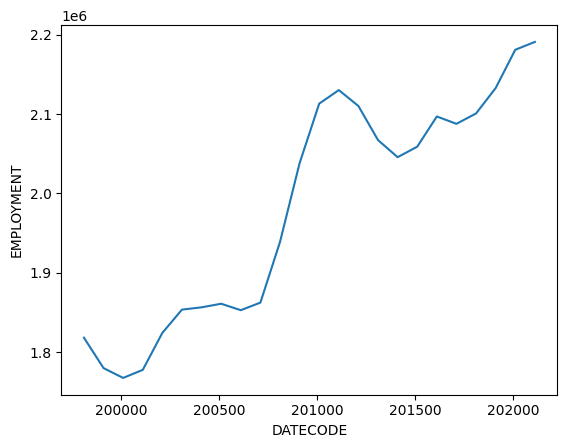

In [118]:
org_size['EMPLOYMENT'].plot()

- 3d plot that shows [5is_mng] against [time, 3agy] 
- 3d plot that shows [employment] against [time, 3agy] 

In [121]:
agy98_21_byagy = agency98_21.groupby('3AGY')

In [69]:
df

,DATECODE,SALARY,EMPLOYMENT,2AGYTYP,3AGY,4AGYSUB,5is_mng
0,199809,"$42,709",1,4,AB,AB00,True
1,199809,"$31,045",1,4,AB,AB00,True
2,199809,"$31,266",1,4,AB,AB00,False
3,199809,"$57,393",1,4,AB,AB00,True
4,199809,NaN,1,4,AB,AB00,True
...,...,...,...,...,...,...,...
2191006,202109,173074.0,1,4,ZS,ZS00,False
2191007,202109,57000.0,1,4,ZS,ZS00,False
2191008,202109,75500.0,1,4,ZS,ZS00,False
2191009,202109,41000.0,1,4,ZS,ZS00,False


In [153]:
1/7

0.14285714285714285

In [144]:
agency98_21_byaid = agency98_21.set_coords(['DATECODE', '3AGY']).set_xindex(['3AGY', 'DATECODE'])

In [147]:
ag = agency98_21_byaid.groupby('index')
ag.mean()

<xarray.Dataset>
Dimensions:     (index: 2922)
Coordinates:
  * index       (index) object MultiIndex
  * 3AGY        (index) object 'AB' 'AC' 'AD' 'AF' 'AG' ... 'ZL' 'ZP' 'ZS' 'ZU'
  * DATECODE    (index) int64 199809 199809 199809 ... 202109 202109 202109
Data variables:
    EMPLOYMENT  (index) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    2AGYTYP     (index) float64 4.0 4.0 3.0 1.0 1.0 3.0 ... 4.0 4.0 4.0 4.0 4.0
    5is_mng     (index) float64 0.8431 0.4211 0.1284 ... 0.3226 0.2414 0.0

In [148]:
ag.count()

<xarray.Dataset>
Dimensions:     (index: 2922)
Coordinates:
  * index       (index) object MultiIndex
  * 3AGY        (index) object 'AB' 'AC' 'AD' 'AF' 'AG' ... 'ZL' 'ZP' 'ZS' 'ZU'
  * DATECODE    (index) int64 199809 199809 199809 ... 202109 202109 202109
Data variables:
    SALARY      (index) int64 45 6 254 165380 107636 388 70 ... 9 4 47 23 29 1
    EMPLOYMENT  (index) int64 51 19 257 166258 107709 399 71 ... 9 7 47 31 29 1
    2AGYTYP     (index) int64 51 19 257 166258 107709 399 71 ... 9 7 47 31 29 1
    4AGYSUB     (index) int64 51 19 257 166258 107709 399 71 ... 9 7 47 31 29 1
    5is_mng     (index) int64 51 19 257 166258 107709 399 71 ... 9 7 47 31 29 1

In [151]:
ag[ag.whe'3AGY' == 'NN')

AttributeError: 'DatasetGroupBy' object has no attribute 'sel'

In [ ]:
for each `3AGY`, `DATECODE`, mng ratio and org size

In [154]:
agency98_21_byaid

<xarray.Dataset>
Dimensions:     (index: 47546547)
Coordinates:
  * index       (index) object MultiIndex
  * 3AGY        (index) object 'AB' 'AB' 'AB' 'AB' 'AB' ... 'ZS' 'ZS' 'ZS' 'ZU'
  * DATECODE    (index) int64 199809 199809 199809 ... 202109 202109 202109
Data variables:
    SALARY      (index) object '$42,709' '$31,045' ... 41000.0 170800.0
    EMPLOYMENT  (index) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    2AGYTYP     (index) int64 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    4AGYSUB     (index) object 'AB00' 'AB00' 'AB00' ... 'ZS00' 'ZS00' 'ZU00'
    5is_mng     (index) bool True True False True ... False False False False

In [ ]:
# agencies to track
# ['NN', 'AF', 'AR', 'DD']

In [137]:
agency98_21.reset_index(dims_or_levels = ['3AGY', 'DATECODE'])

ValueError: ('DATECODE', '3AGY') are not coordinates with an index

In [132]:
agency98_21.expand_dims('DATECODE')

ValueError: DATECODE already exists as coordinate or variable name.

In [180]:
agency98_21
# count, 3d array tidyverse lib defined data repres (obs is a row, row has all feature)
# arviz has one datastructure (if only in dataframe - tidy)
# can have multidim array with label, (automatic align)

<xarray.Dataset>
Dimensions:     (index: 47546547)
Coordinates:
  * index       (index) int64 0 1 2 3 4 ... 2191007 2191008 2191009 2191010
Data variables:
    DATECODE    (index) int64 199809 199809 199809 ... 202109 202109 202109
    SALARY      (index) object '$42,709' '$31,045' ... 41000.0 170800.0
    EMPLOYMENT  (index) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    2AGYTYP     (index) int64 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4
    3AGY        (index) object 'AB' 'AB' 'AB' 'AB' 'AB' ... 'ZS' 'ZS' 'ZS' 'ZU'
    4AGYSUB     (index) object 'AB00' 'AB00' 'AB00' ... 'ZS00' 'ZS00' 'ZU00'
    5is_mng     (index) bool True True False True ... False False False False

In [98]:
agencyid98_21 = agency98_21.stack(agy_time = ['DATECODE', '3AGY'])

ValueError: conflicting dimensions for multi-index product variables 'DATECODE' ('index',), '3AGY' ('index',)

In [101]:
agency98_21.where(agency98_21["DATECODE"] == 202109, drop=True)
sup = df.groupby("3AGY")['5is_mng'].sum()
tot = df.groupby("3AGY")['EMPLOYMENT'].count()
suptot = pd.concat([sup, tot], axis = 1)
suptot["ratio"]= suptot["5is_mng"]/suptot["EMPLOYMENT"]

KeyError: '3AGY'

In [95]:
da_multiindex = da.stack(my_multiindex=['time.year','time.month'])

da_mean = da.groupby("my_multiindex").mean()

da_mean.unstack()  # go back to normal index

agency98_21.groupby(['DATECODE','3AGY'])['5is_mng'].sum()
# sup = df.groupby("3AGY")['5is_mng'].sum()
# tot = df.groupby("3AGY")['EMPLOYMENT'].count()

TypeError: `group` must be an xarray.DataArray or the name of an xarray variable or dimension. Received ['DATECODE', '3AGY'] instead.

In [ ]:
agency98_21.groupby(['DATECODE','3AGY'])['5is_mng'].sum()

In [ ]:
old_only4.where(old_only4["year"] == 2000, drop=True)

In [87]:
agency98_21.where(DATECODE = 199809)

TypeError: where() got an unexpected keyword argument 'DATECODE'

<AxesSubplot: >

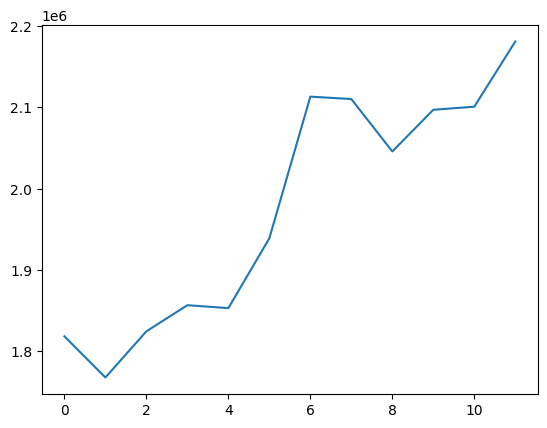

In [33]:
#1818142 + 1767442 + 
pd.Series([len(i.index)  for i in xr_lst]).plot()

In [35]:
dynag = xr.concat([xr for xr in xr_lst], dim = "index")


<xarray.Dataset>
Dimensions:   (index: 23705998)
Coordinates:
  * index     (index) int64 0 1 2 3 4 ... 2181102 2181103 2181104 2181105
    DATECODE  (index) int64 199809 199809 199809 199809 ... 202009 202009 202009
Data variables:
    SALARY    (index) object '$42,709' '$31,045' '$31,266' ... 70072.0 64682.0
    2AGYTYP   (index) int64 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4 4
    3AGY      (index) object 'AB' 'AB' 'AB' 'AB' 'AB' ... 'ZU' 'ZU' 'ZU' 'ZU'
    4AGYSUB   (index) object 'AB00' 'AB00' 'AB00' ... 'ZU00' 'ZU00' 'ZU00'
    5is_mng   (index) bool True True False True True ... False True False False

In [5]:
# manager's salary greater than nonmanager, salary_frac = .8 TODO: why such small diff?
df.groupby('5is_mng')['SALARY'].mean()

5is_mng
False     86602.555180
True     116846.855898
Name: SALARY, dtype: float64

In [31]:
sup = df.groupby("3AGY")['5is_mng'].sum()
tot = df.groupby("3AGY")['EMPLOYMENT'].count()
suptot = pd.concat([sup, tot], axis = 1)
suptot["ratio"]= suptot["5is_mng"]/suptot["EMPLOYMENT"]

In [53]:
np.sqrt(1/7)                                  

0.0005892857142857143

In [36]:
# larger the agency, smaller employment ratio
suptot.ratio.corr(suptot.EMPLOYMENT)

-0.20341134531260577

array([[<AxesSubplot: title={'center': '5is_mng'}>,
        <AxesSubplot: title={'center': 'EMPLOYMENT'}>],
       [<AxesSubplot: title={'center': 'ratio'}>, <AxesSubplot: >]],
      dtype=object)

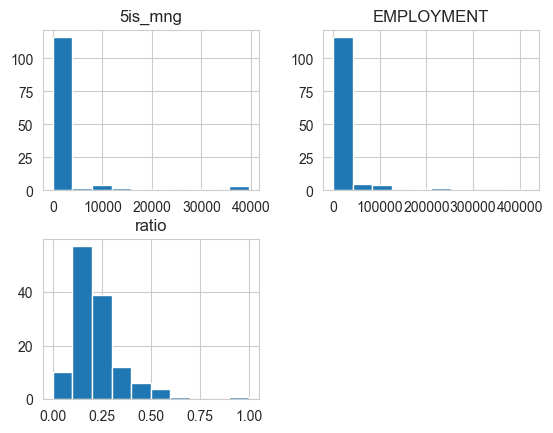

In [37]:
suptot.hist()

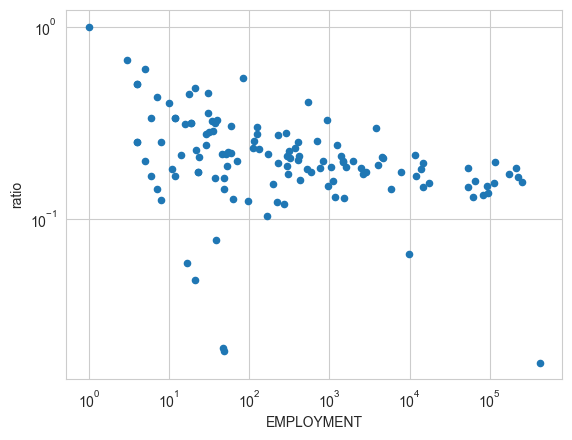

In [6]:
scale_plot(TIME)

## DYNAMIC ANALYSIS (1809 vs 2109)

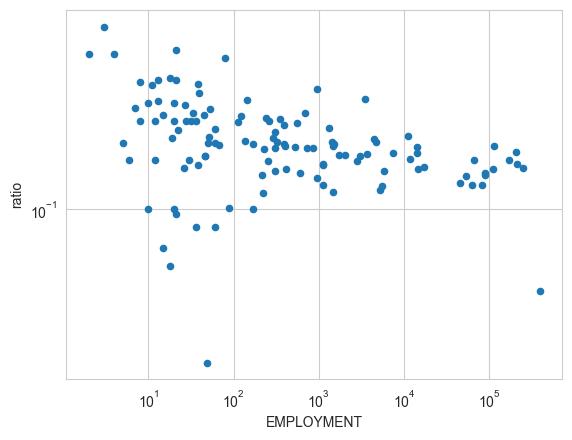

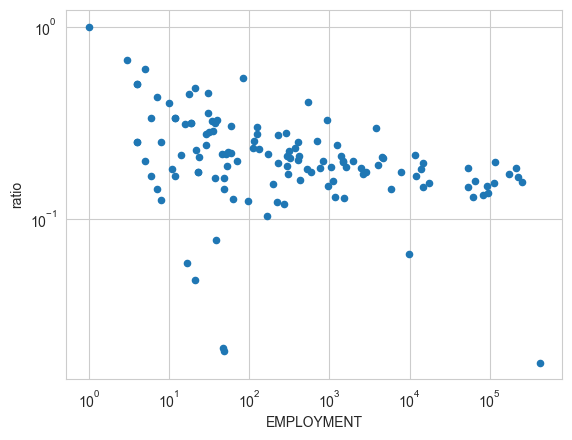

In [5]:
TIME_YEAR = ["18", "21"]
TIME_MONTH = "09"
df_dict = dict() # upgrade to xarray with time coordinate
for year in TIME_YEAR:
     TIME = year + TIME_MONTH
     #df_dict[TIME] = hierarchize_org(TIME, features = ['SALARY', 'EMPLOYMENT'], layers = 5) # create pkl
     scale_plot(TIME)

In [ ]:
## NEXT?

## DIVING INTO HIERARCHY

In [25]:
for i in range(2, df.shape[1]):
     a = pd.unique(df.iloc[:, i])
     print(df.columns[i], len(a),a)

2AGYTYP 4 [4 1 3 2]
3AGY 130 ['AA' 'AB' 'AF' 'AG' 'AH' 'AM' 'AN' 'AP' 'AR' 'AU' 'AW' 'BD' 'BF' 'BG'
 'BH' 'BK' 'BO' 'BT' 'BW' 'CC' 'CE' 'CF' 'CM' 'CT' 'CU' 'CX' 'DB' 'DD'
 'DG' 'DJ' 'DL' 'DN' 'DQ' 'EB' 'EC' 'ED' 'EE' 'EO' 'EP' 'EQ' 'EW' 'FC'
 'FD' 'FI' 'FJ' 'FK' 'FL' 'FM' 'FQ' 'FR' 'FT' 'FW' 'GB' 'GC' 'GE' 'GG'
 'GJ' 'GQ' 'GS' 'GU' 'GW' 'GX' 'GY' 'GZ' 'HB' 'HD' 'HE' 'HF' 'HP' 'HS'
 'HT' 'HU' 'HW' 'IB' 'IF' 'IG' 'IN' 'IP' 'JL' 'KS' 'KY' 'LF' 'LP' 'MA'
 'MC' 'MI' 'NF' 'NK' 'NL' 'NM' 'NN' 'NP' 'NQ' 'NS' 'NU' 'NV' 'OM' 'OS'
 'PU' 'QQ' 'RE' 'RF' 'RH' 'RO' 'RR' 'RS' 'SB' 'SE' 'SK' 'SM' 'SS' 'ST'
 'SZ' 'TB' 'TC' 'TD' 'TN' 'TR' 'TS' 'TW' 'UJ' 'UT' 'VA' 'VD' 'WK' 'WX'
 'ZL' 'ZP' 'ZS' 'ZU']
4AGYSUB 533 ['AA00' 'AB00' 'AF02' 'AF03' 'AF06' 'AF07' 'AF09' 'AF0B' 'AF0D' 'AF0J'
 'AF0M' 'AF0R' 'AF0U' 'AF0V' 'AF12' 'AF13' 'AF16' 'AF17' 'AF1B' 'AF1C'
 'AF1L' 'AF1M' 'AF1Q' 'AF1S' 'AF1Y' 'AF20' 'AF2A' 'AF2E' 'AF2F' 'AF2H'
 'AF2I' 'AF2K' 'AF2L' 'AF2M' 'AF2R' 'AF2S' 'AF2T' 'AF2Z' 'AF34' 'AF38'
 'AF3C' 'AF3D'

In [105]:
# set(df_af.AGYSUBT)

{'AF02-AIR FORCE INSPECTION AGENCY (FO)',
 'AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER',
 'AF06-AIR FORCE AUDIT AGENCY',
 'AF07-AIR FORCE OFFICE OF SPECIAL INVESTIGATIONS',
 'AF09-AIR FORCE PERSONNEL CENTER',
 'AF0B-U.S. AIR FORCE ACADEMY',
 'AF0D-U.S. AIR FORCES, EUROPE',
 'AF0J-AIR EDUCATION AND TRAINING COMMAND',
 'AF0M-HEADQUARTERS, AIR FORCE RESERVE COMMAND',
 'AF0R-PACIFIC AIR FORCES',
 'AF0U-25 AF',
 'AF0V-AIR FORCE SPECIAL OPERATIONS COMMAND',
 'AF12-AIR FORCE PUBLIC AFFAIRS AGENCY',
 'AF13-HQ USAF AND SUPPORT ELEMENTS',
 'AF16-AIR FORCE MORTUARY AFFAIRS OPERATIONS',
 'AF17-AF INSTALLATION AND MISSION SUPPORT',
 'AF1B-AIR FORCE MANPOWER ANALYSIS AGENCY',
 'AF1C-AIR COMBAT COMMAND',
 'AF1L-AIR MOBILITY COMMAND',
 'AF1M-AIR FORCE MATERIEL COMMAND',
 'AF1Q-HQ AF FLIGHT STANDARDS AGENCY',
 'AF1S-HEADQUARTERS, AIR FORCE SPACE COMMAND',
 'AF1Y-AIR FORCE CIVILIAN CAREER TRAINING',
 'AF20-AIR FORCE AGENCY FOR MODELING/SIMULATION',
 'AF2A-AIR FORCE COST ANALYSIS AGENCY',
 'AF

<AxesSubplot: >

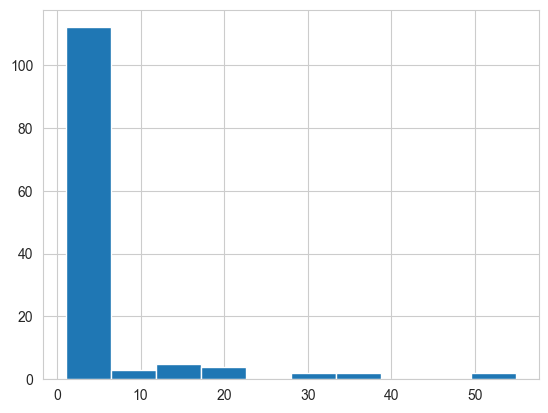

In [138]:
# graph of groupby('3AGY')['4AGYSUB'].count().hist()

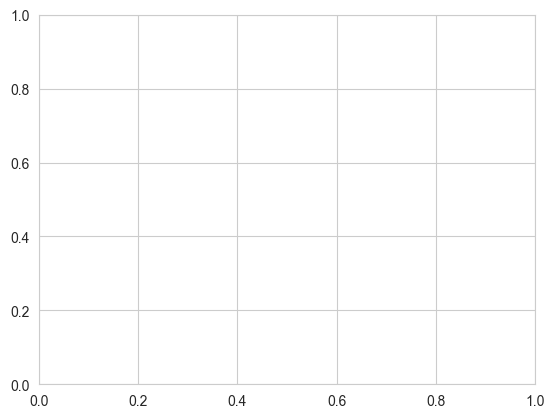

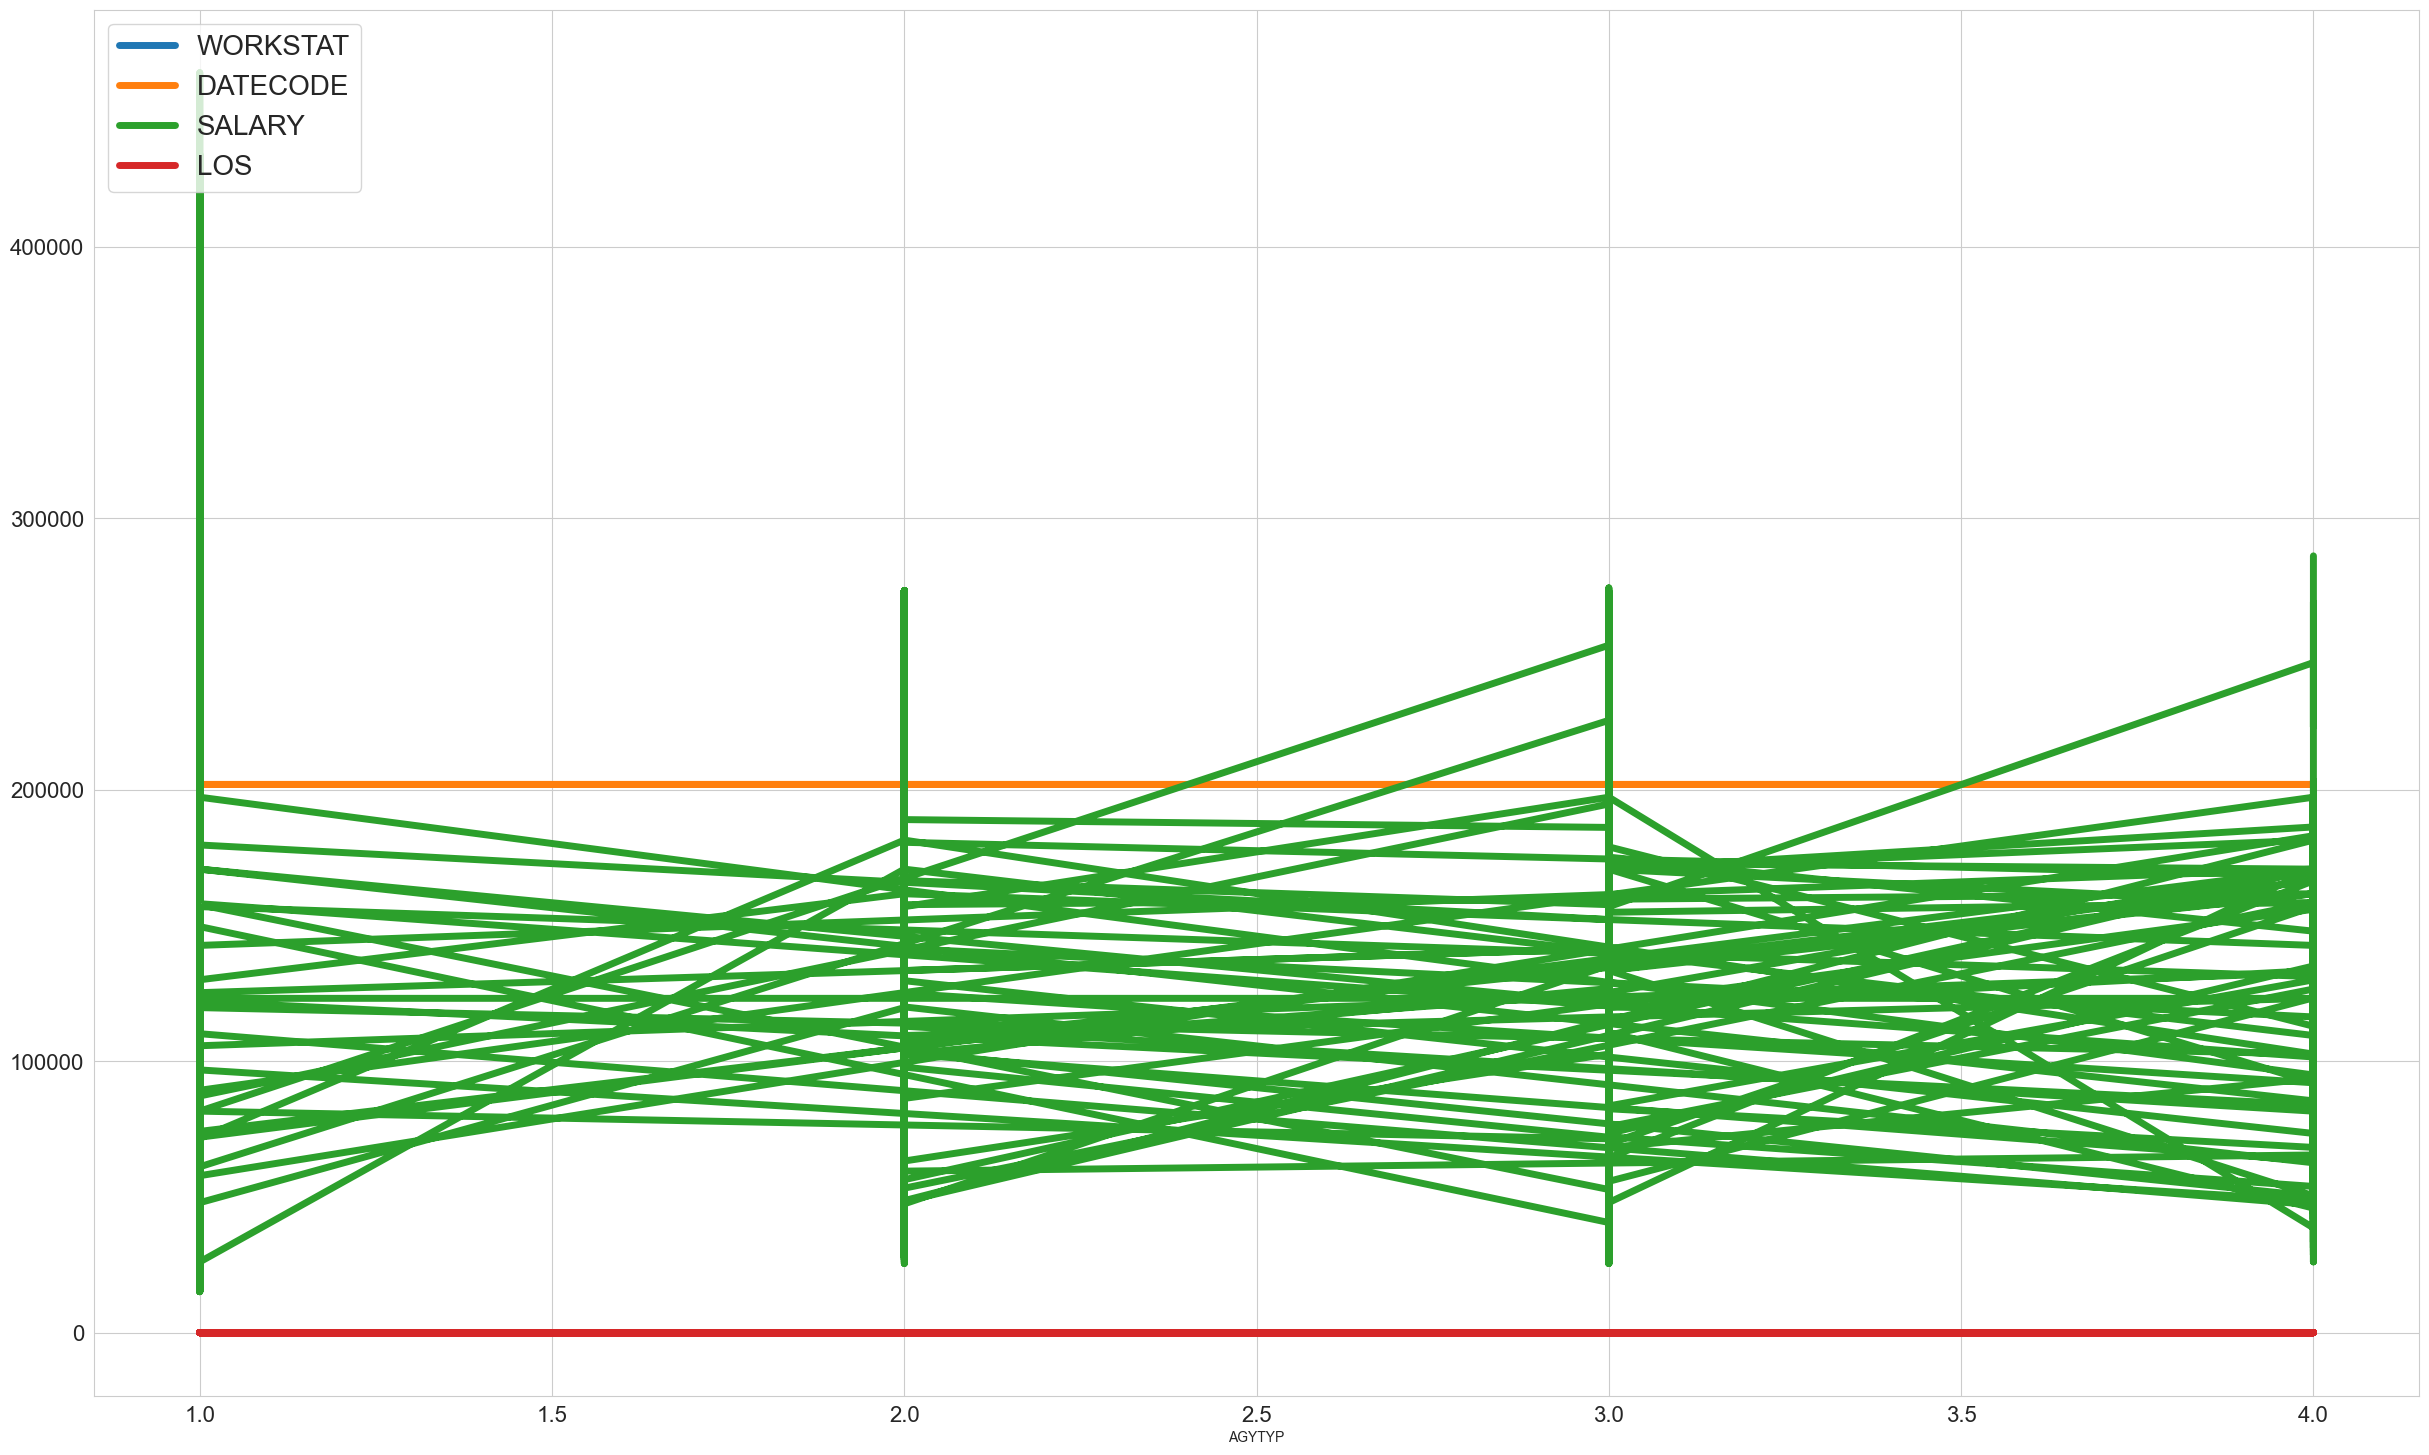

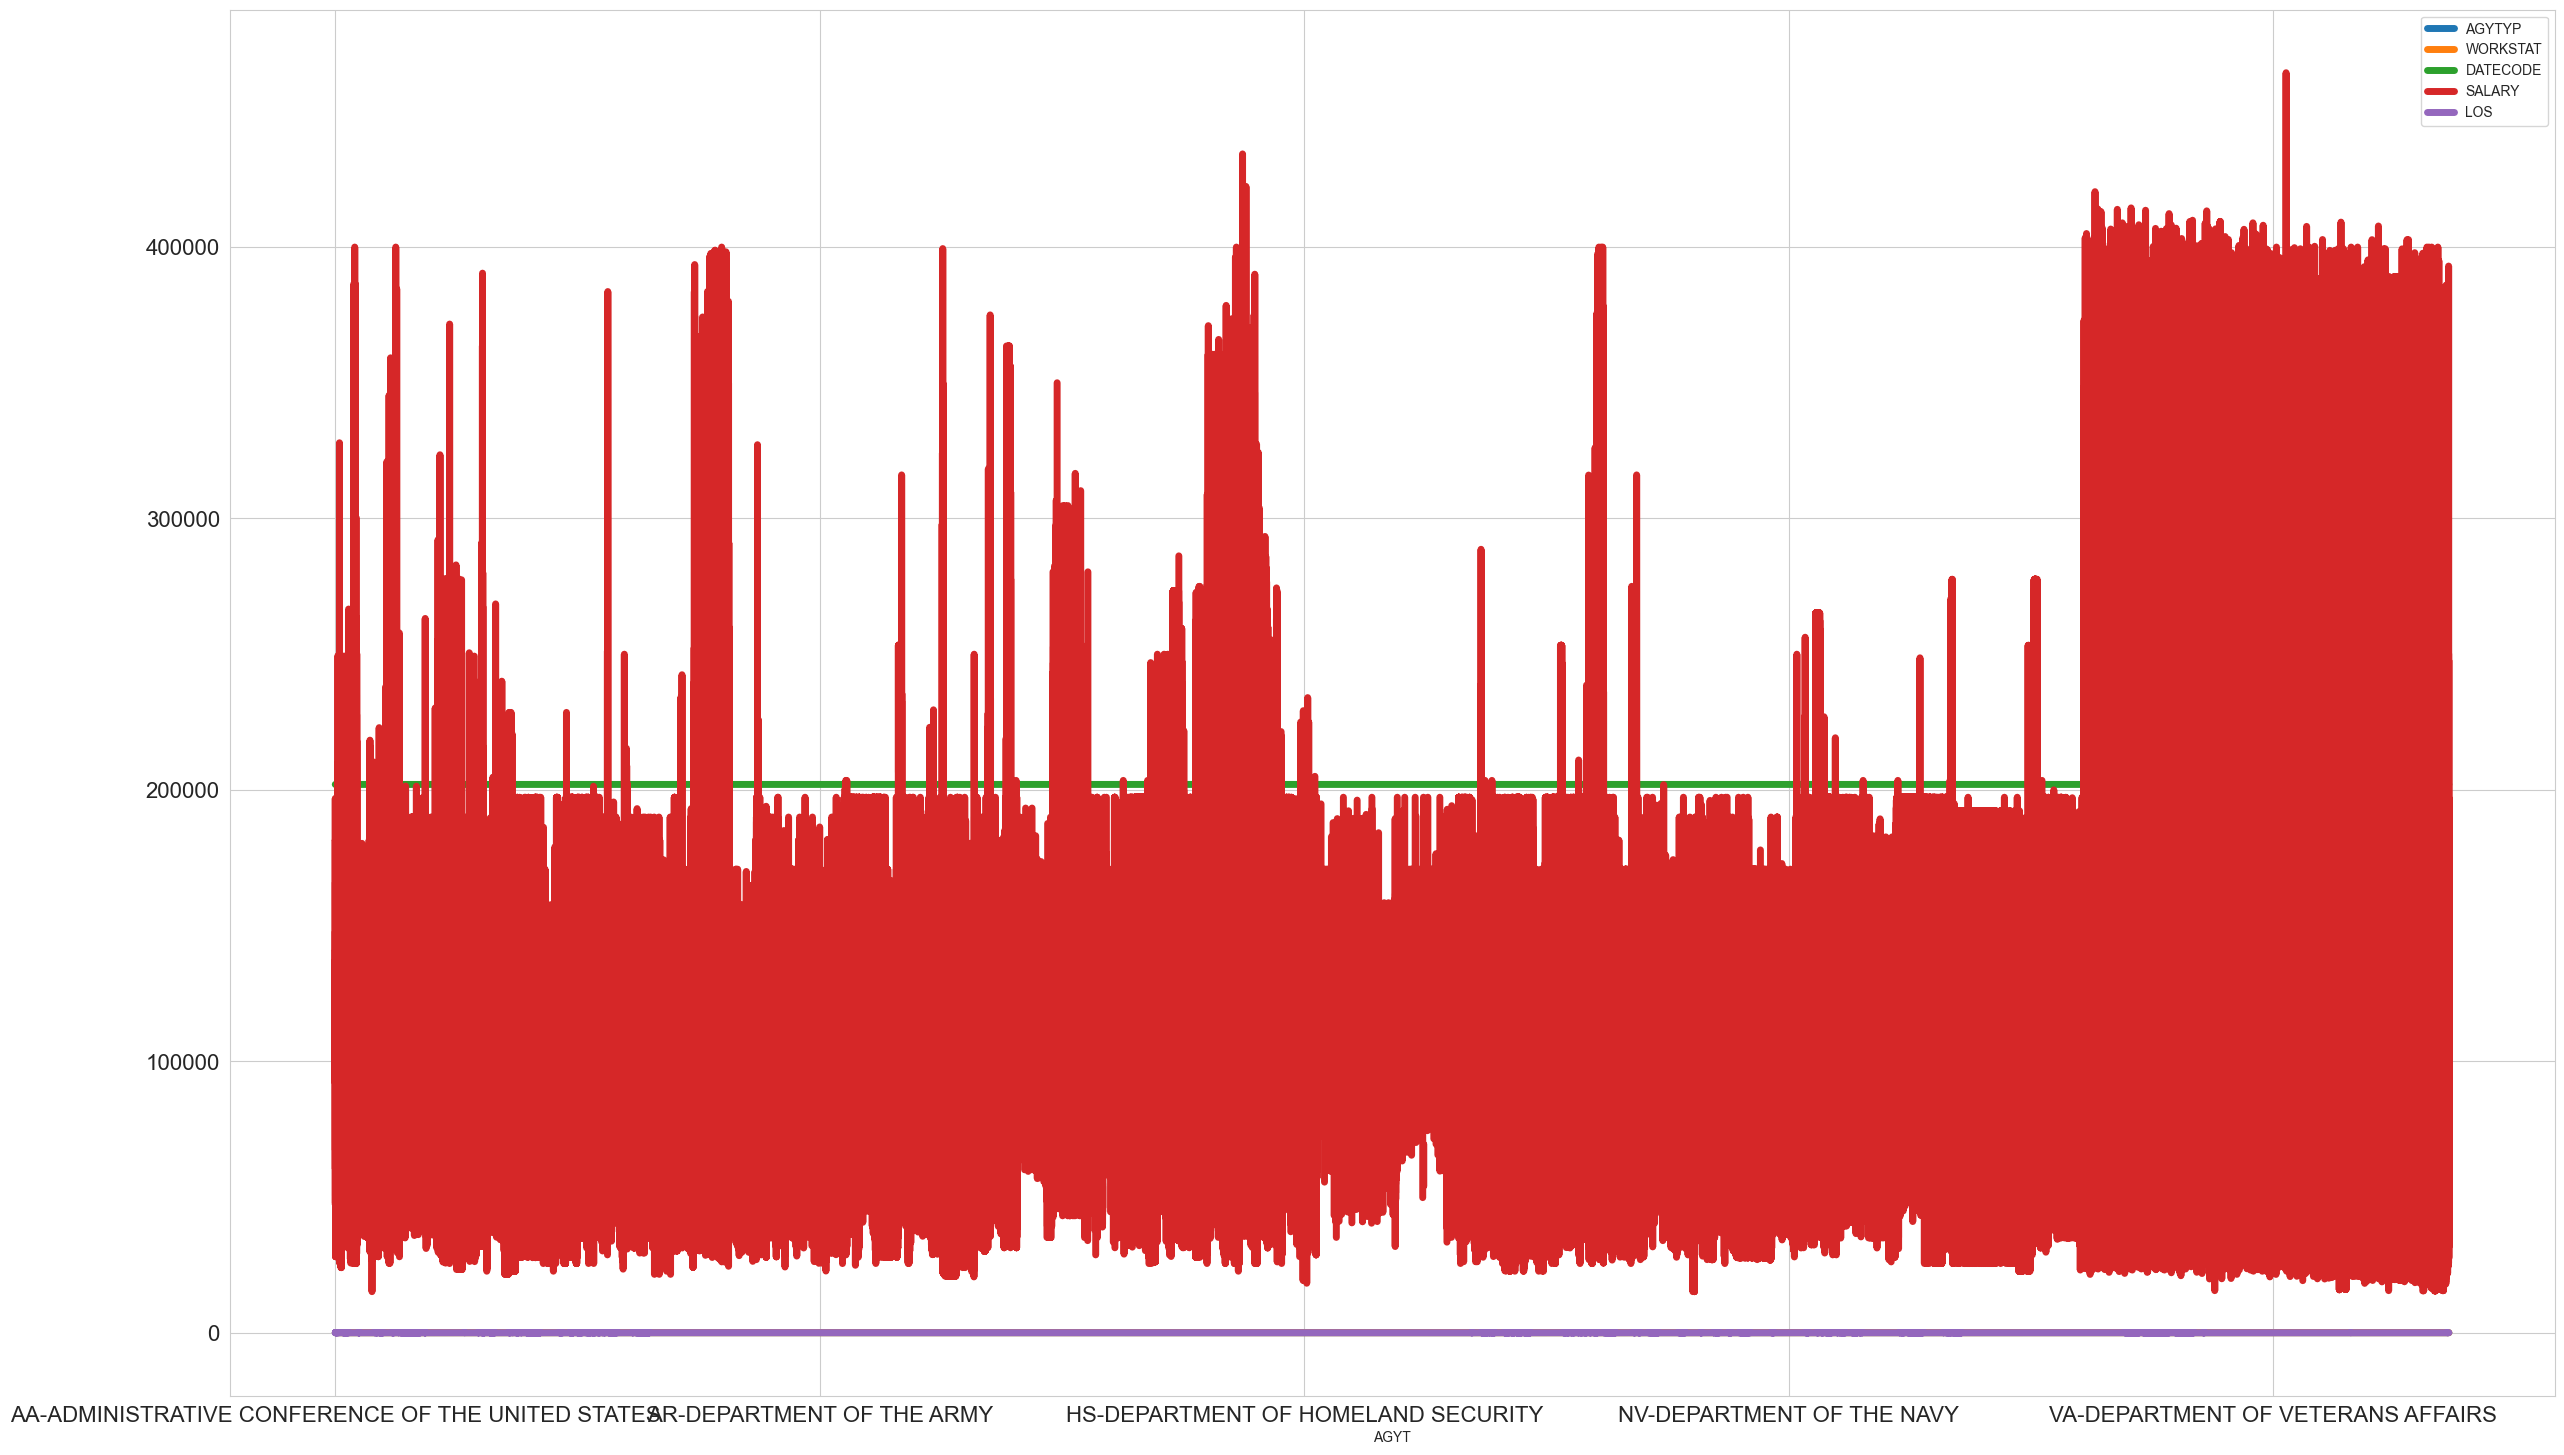

In [90]:
#df['AGYTYP'].hist()
plt.subplots()
ax1 = df.plot('AGYTYP',figsize=(30,18),linewidth=5,legend=True, fontsize=16)
ax1.legend(loc=2,fontsize=20)
ax2 = df.plot('AGYT',figsize=(30,18),linewidth=5,legend=True, fontsize=16)
plt.show()
#df['AGYTYPT'].hist()

## Plot

In [ ]:
sup18 = df.groupby("AGY")['sup'].sum()
tot18 = df_all.groupby("AGY")['EMPLOYMENT'].count()
supbytot = pd.concat([sup18, tot18], axis = 1)

print(df_super.groupby("AGY")["EMPLOYMENT"].count())
print(df_sub.groupby("AGY")["EMPLOYMENT"].count())

In [10]:
# number of managers in each AGY
df.groupby("AGY")['is_mng'].sum()

AGY
AA        4
AB       45
AF    29928
AG    13559
AH       88
      ...  
WX        2
ZL        1
ZP       11
ZS        7
ZU        3
Name: is_mng, Length: 130, dtype: int64

3AGY
AA        4
AB       45
AF    29928
AG    13559
AH       88
      ...  
WX        2
ZL        1
ZP       11
ZS        7
ZU        3
Name: 5is_mng, Length: 130, dtype: int64